# Vehicle Detection and Tracking Project

### Import needed data

In [24]:
import os
import cv2
import math
import numpy as np
from random import randint
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing

### Define data set image paths for both positive and negative domains

In [2]:
Veh_Imgs_Path = "./../udacity_dataset/vehicles/vehicles/"
NonVeh_Imgs_Path = "./../udacity_dataset/non_vehicles/non_vehicles/"

Veh_Imgs = os.listdir(Veh_Imgs_Path)
NonVeh_Imgs = os.listdir(NonVeh_Imgs_Path)

### Collect Data set images

In [3]:
def CollectImages(folderpath, ImagePaths, isLabeled = True):
    images = []
    for ImagePath in ImagePaths:
        if (len(ImagePath.split('.')) == 2):
            im = cv2.imread(folderpath + ImagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            #print('Image ' , ImagePath , ' is: ', type(im), ' with dimensions: ', im.shape)
            if isLabeled == True:
                images.append((im, ImagePath.split('.')[0]))
            else:
                images.append(im)
        else:
            print('Image', ImagePath, 'is correupted --> Discarded.')

    return images

In [4]:
CarImageSet = []
NonCarImageSet = []

for folder in Veh_Imgs:
    folderpath = Veh_Imgs_Path + folder
    Carsimagespath = os.listdir(folderpath)
    CarImageSet.append(CollectImages(folderpath + '/', Carsimagespath, True))

for folder in NonVeh_Imgs:
    folderpath = NonVeh_Imgs_Path + folder
    NonCarsimagespath = os.listdir(folderpath)
    NonCarImageSet.append(CollectImages(folderpath + '/', NonCarsimagespath, True))

CarImageSet = np.concatenate(CarImageSet)
NonCarImageSet = np.concatenate(NonCarImageSet)

print('Car Image Set has ', str(len(CarImageSet)))
print('Non Car Image Set has ', str(len(NonCarImageSet)))

Car Image Set has  8792
Non Car Image Set has  8968


### Define to access both image pixel values and labels

In [5]:
imgPxlVal = 0
img_Label = 1

## Visualize DataSet

In [6]:
def pltImages(images, labels, nrows = 1, ncols = 2, fig_w = 20, fig_h = 10, isgray = False):
    #below code is inspired from https://stackoverflow.com/questions/17111525/how-to-show-multiple-images-in-one-figure
    assert len(images) == len(labels)
    assert len(images) <= (nrows * ncols)
    
    fig = plt.figure(figsize=(fig_w, fig_h))
    
    for index in range(len(images)):
        plot = fig.add_subplot(nrows,ncols,index+1)
        plot.set_title(labels[index])
        if(isgray == False):
            plt.imshow(images[index].squeeze())
        else:
            plt.imshow(images[index].squeeze(), cmap='gray')
    
    plt.tight_layout()
    plt.show()

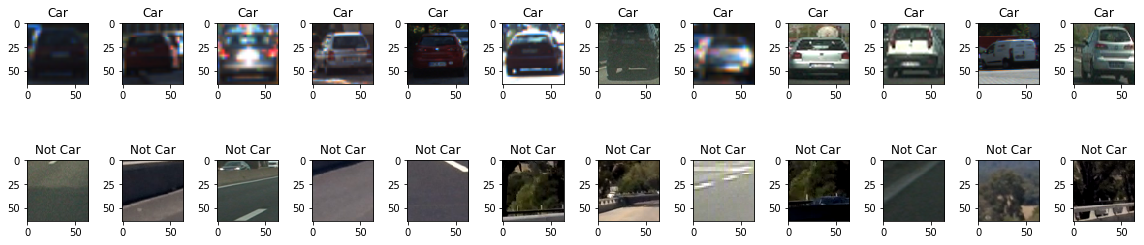

In [7]:
vis_imgs = []
vis_labels = []

#show 12 random images from Car dataset
for i in range(12):
    index = randint(0, len(CarImageSet))
    vis_imgs.append(CarImageSet[index][imgPxlVal])
    vis_labels.append('Car')

#show 12 random images from Not Car dataset
for i in range(12):
    index = randint(0, len(NonCarImageSet))
    vis_imgs.append(NonCarImageSet[index][imgPxlVal])
    vis_labels.append('Not Car')

pltImages(vis_imgs, vis_labels, 2, 12, 16, 4)

### Visualize color space features using histograms

In [8]:
def pltHistograms(hists, labels, nrows = 1, ncols = 2, fig_w = 20, fig_h = 10, xlim = [0,256]):
    assert len(hists) == len(labels)
    assert len(hists) <= (nrows * ncols)
    
    fig = plt.figure(figsize=(fig_w, fig_h))
    
    for index in range(len(hists)):
        plot = fig.add_subplot(nrows,ncols,index+1)
        plot.set_title(labels[index])
        plt.plot(hists[index])
        plt.xlim(xlim)
    
    plt.tight_layout()
    plt.show()

In [9]:
Channel_0 = 0
Channel_1 = 1
Channel_2 = 2

histSize = [48]
histrange = [0,255]

ColorSpace = ['RGB','HSV','HLS', 'LAB', 'YUV', 'LUV', 'YCrCb']

In [10]:
def ExploreColorSpaceHistogram(img):
    hist = []
    hist_label = []

    hist_0 = cv2.calcHist(img,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(img,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(img,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("RGB_Channel 0")
    hist.append(hist_1)
    hist_label.append("RGB_Channel 1")
    hist.append(hist_2)
    hist_label.append("RGB_Channel 2")

    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    hist_0 = cv2.calcHist(HSV,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(HSV,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(HSV,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("HSV_Channel 0")
    hist.append(hist_1)
    hist_label.append("HSV_Channel 1")
    hist.append(hist_2)
    hist_label.append("HSV_Channel 2")

    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    hist_0 = cv2.calcHist(HLS,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(HLS,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(HLS,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("HLS_Channel 0")
    hist.append(hist_1)
    hist_label.append("HLS_Channel 1")
    hist.append(hist_2)
    hist_label.append("HLS_Channel 2")

    LAB = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    hist_0 = cv2.calcHist(LAB,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(LAB,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(LAB,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("LAB_Channel 0")
    hist.append(hist_1)
    hist_label.append("LAB_Channel 1")
    hist.append(hist_2)
    hist_label.append("LAB_Channel 2")

    YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    hist_0 = cv2.calcHist(YUV,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(YUV,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(YUV,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("YUV_Channel 0")
    hist.append(hist_1)
    hist_label.append("YUV_Channel 1")
    hist.append(hist_2)
    hist_label.append("YUV_Channel 2")

    LUV = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

    hist_0 = cv2.calcHist(LUV,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(LUV,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(LUV,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("LUV_Channel 0")
    hist.append(hist_1)
    hist_label.append("LUV_Channel 1")
    hist.append(hist_2)
    hist_label.append("LUV_Channel 2")
    
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    hist_0 = cv2.calcHist(YCrCb,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(YCrCb,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(YCrCb,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("YCrCb_Channel 0")
    hist.append(hist_1)
    hist_label.append("YCrCb_Channel 1")
    hist.append(hist_2)
    hist_label.append("YCrCb_Channel 2")

    pltHistograms(hist, hist_label, 7, 3, xlim = [0, histSize[0]-1])

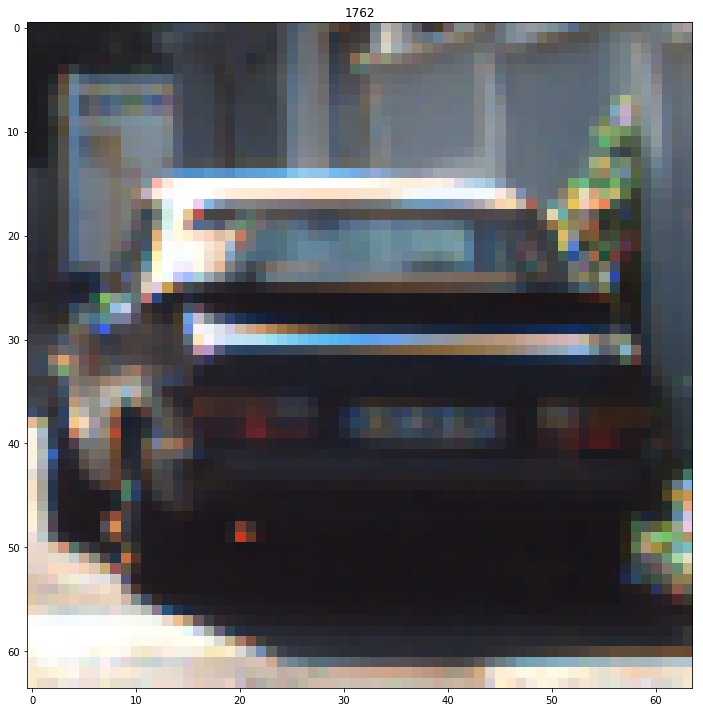

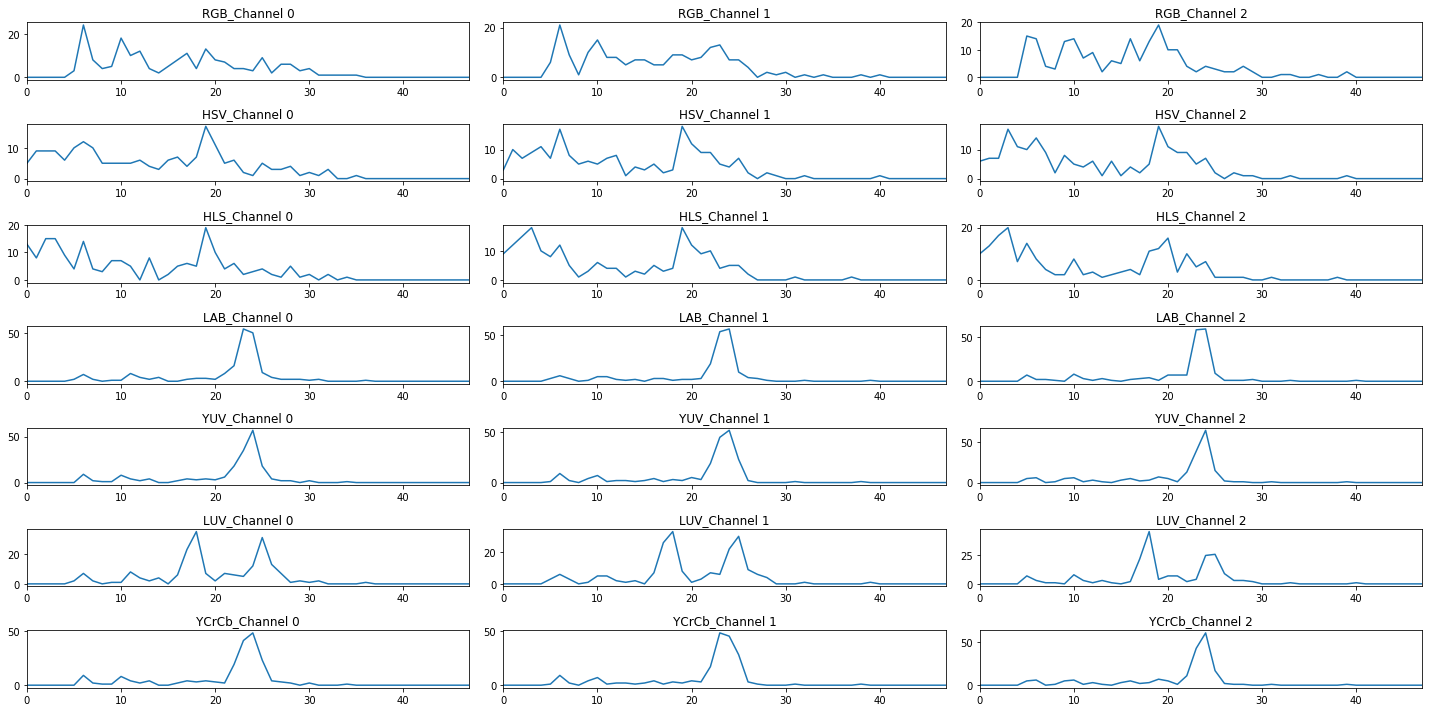

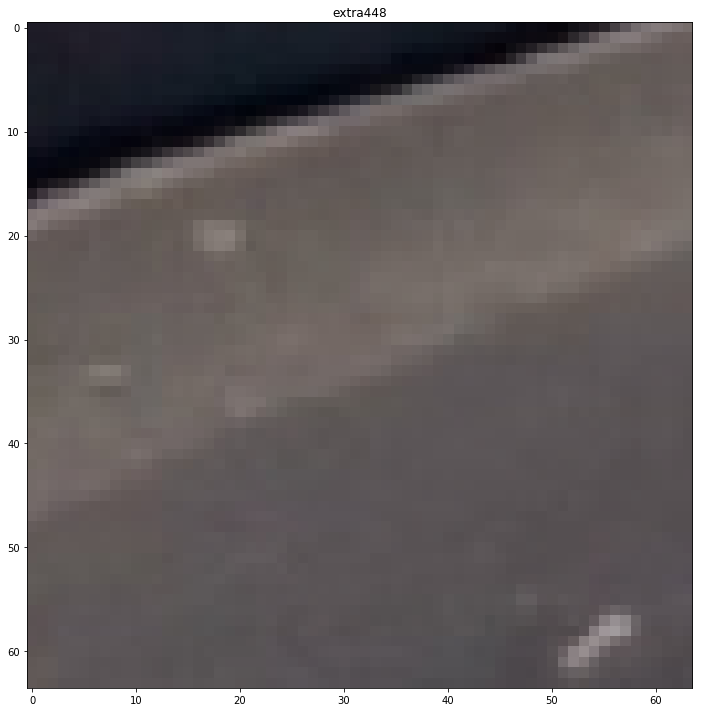

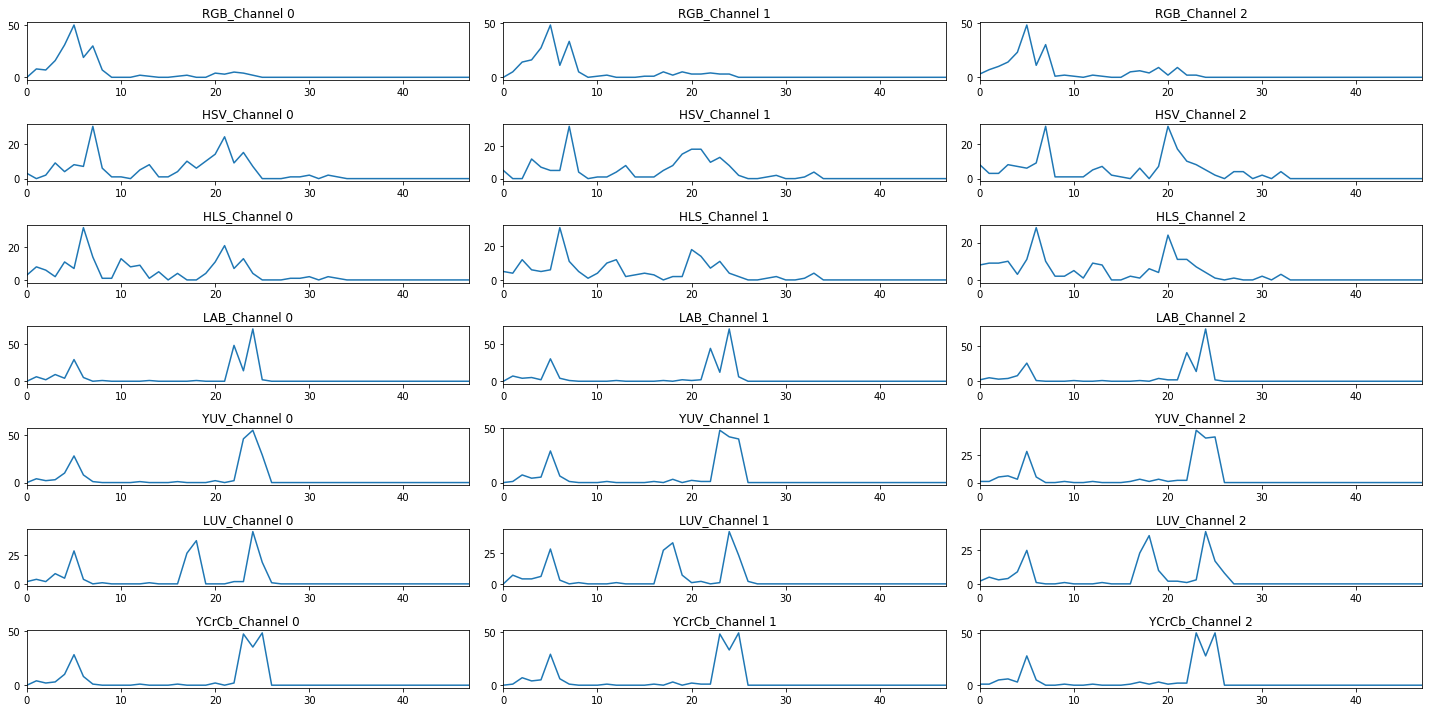

In [11]:
#CarImageIndex = 0
CarImageIndex = randint(0, len(CarImageSet))
CarImage = [CarImageSet[CarImageIndex][imgPxlVal]]
CarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(CarImage, CarImageLabel, 1, 1)
ExploreColorSpaceHistogram(CarImage[0])

#NonCarImageIndex = 0
NonCarImageIndex = randint(0, len(NonCarImageSet))
NonCarImage = [NonCarImageSet[NonCarImageIndex][imgPxlVal]]
NonCarImageLabel = [NonCarImageSet[NonCarImageIndex][img_Label]]

pltImages(NonCarImage, NonCarImageLabel, 1, 1)
ExploreColorSpaceHistogram(NonCarImage[0])

Spatial Binning

In [12]:
#Code obtained from Udacity lesson 16
def bin_spatial_Demo_colorspace(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'LAB':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

In [13]:
size=(8, 8)

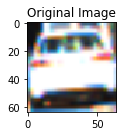

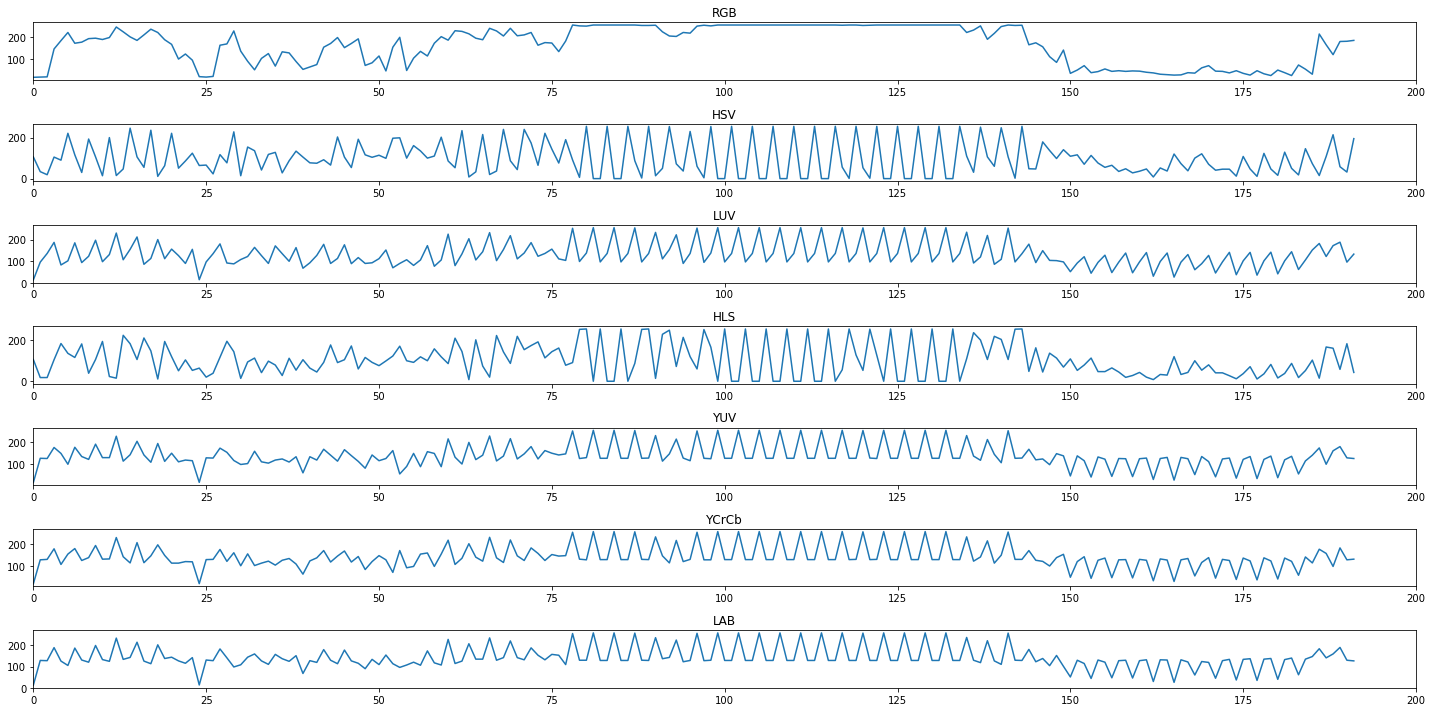

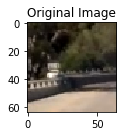

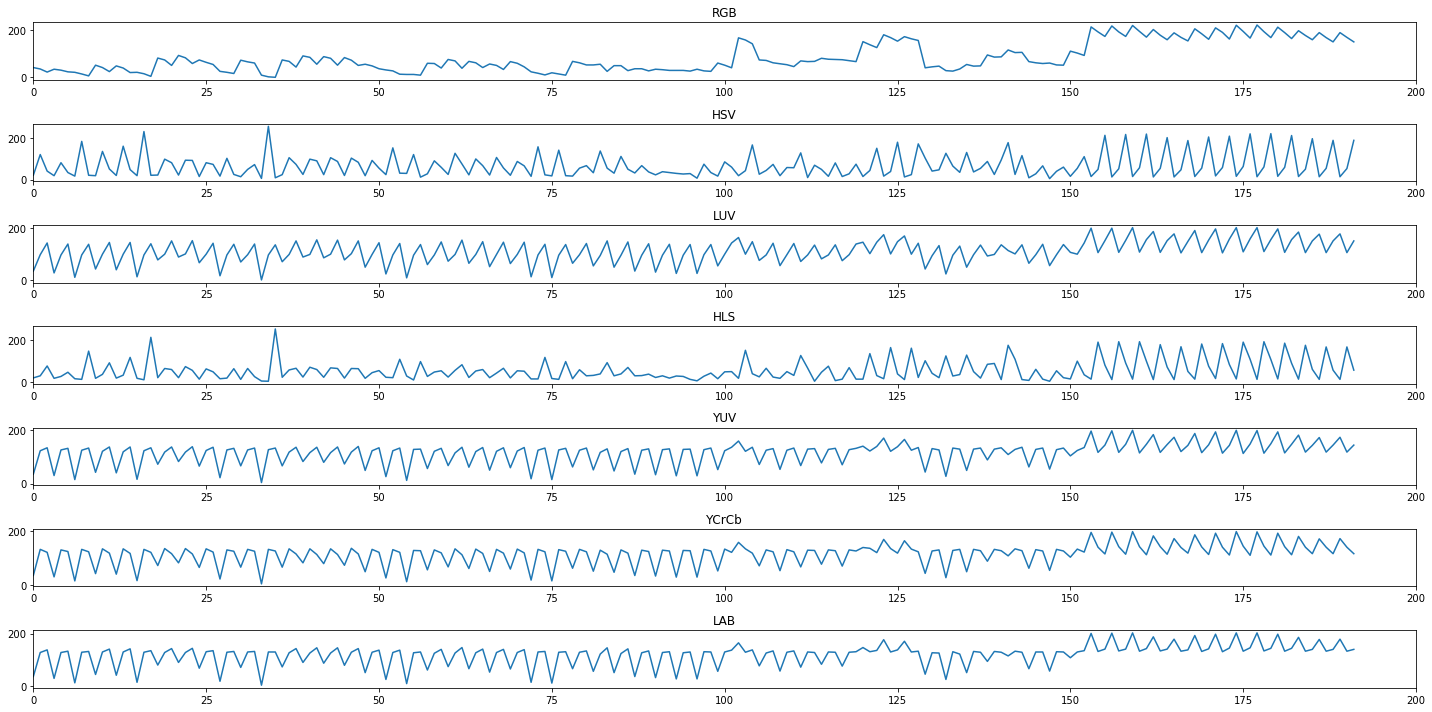

In [14]:
vis_imgs = []
vis_labels = []

index = randint(0, len(CarImageSet))

vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], size=size))
vis_labels.append('RGB')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='HSV', size=size))
vis_labels.append('HSV')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='LUV', size=size))
vis_labels.append('LUV')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='HLS', size=size))
vis_labels.append('HLS')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='YUV', size=size))
vis_labels.append('YUV')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='YCrCb', size=size))
vis_labels.append('YCrCb')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='LAB', size=size))
vis_labels.append('LAB')

pltImages([CarImageSet[index][imgPxlVal]], ["Original Image"], 1, 1, 20, 2)
pltHistograms(vis_imgs, vis_labels, 7, 1, xlim = [0, 200])

vis_imgs = []
vis_labels = []

index = randint(0, len(NonCarImageSet))

vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], size=size))
vis_labels.append('RGB')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='HSV', size=size))
vis_labels.append('HSV')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='LUV', size=size))
vis_labels.append('LUV')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='HLS', size=size))
vis_labels.append('HLS')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='YUV', size=size))
vis_labels.append('YUV')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='YCrCb', size=size))
vis_labels.append('YCrCb')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='LAB', size=size))
vis_labels.append('LAB')

pltImages([NonCarImageSet[index][imgPxlVal]], ["Original Image"], 1, 1, 20, 2)
pltHistograms(vis_imgs, vis_labels, 7, 1, xlim = [0, 200])

#### I started with resize to 32*32 but the output proved to be very large, 3072, which I consider very large for a soft qualifier like this and better to be downsampled to 8*8

#### All color spaces provide different signatures between the two classes, take RGB for simplicity

### Visualize HOG features

In [15]:
def get_hog_features_demo(img, orient, pix_per_cell, cell_per_block, blockNorm, trns_sqrt, visualize=False, feature_vec=True):
    if visualize == True:
        features, hog_im = hog(img,
                               orientations=orient,
                               pixels_per_cell=(pix_per_cell, pix_per_cell),
                               cells_per_block=(cell_per_block, cell_per_block),
                               block_norm = blockNorm, #Block Normalize didn't show any change effect on image
                               transform_sqrt=trns_sqrt, 
                               visualise=visualize,
                               feature_vector=feature_vec)
        return features, hog_im
    else:      
        features = hog(img,
                       orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       block_norm = blockNorm, #Block Normalize didn't show any change effect on image
                       transform_sqrt=trns_sqrt, 
                       visualise=visualize,
                       feature_vector=feature_vec)
        return features

In [16]:
orient = 8
pix_per_cell = 16
cells_per_block = 2
TransformSqrt = True

blockNorm = ['L1', 'L1-sqrt', 'L2', 'L2-Hys']

hc = 'ALL'

In [17]:
def VisauliseHOG(img):
    vis = True
    __, hog_im = get_hog_features_demo(
        img,
        orient,
        pix_per_cell,
        cells_per_block,
        'L2-Hys',
        visualize=vis,
        trns_sqrt=TransformSqrt,
        feature_vec=False)
    return hog_im

In [18]:
def ExploreHOGSpace(img):
    HOG_IMs = []
    hog_label = []
    
    hog_0 = VisauliseHOG(img[:,:,Channel_0])
    hog_1 = VisauliseHOG(img[:,:,Channel_1])
    hog_2 = VisauliseHOG(img[:,:,Channel_2])
    pltImages([hog_0], ["RGB_Channel 0"], 1, 1)
    pltImages([hog_1], ["RGB_Channel 1"], 1, 1)
    pltImages([hog_2], ["RGB_Channel 2"], 1, 1)

    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    hog_0 = VisauliseHOG(HSV[:,:,Channel_0])
    hog_1 = VisauliseHOG(HSV[:,:,Channel_1])
    hog_2 = VisauliseHOG(HSV[:,:,Channel_2])
    pltImages([hog_0], ["HSV_Channel 0"], 1, 1)
    pltImages([hog_1], ["HSV_Channel 1"], 1, 1)
    pltImages([hog_2], ["HSV_Channel 2"], 1, 1)

    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    hog_0 = VisauliseHOG(HLS[:,:,Channel_0])
    hog_1 = VisauliseHOG(HLS[:,:,Channel_1])
    hog_2 = VisauliseHOG(HLS[:,:,Channel_2])
    pltImages([hog_0], ["HLS_Channel 0"], 1, 1)
    pltImages([hog_1], ["HLS_Channel 1"], 1, 1)
    pltImages([hog_2], ["HLS_Channel 2"], 1, 1)

    LAB = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    hog_0 = VisauliseHOG(LAB[:,:,Channel_0])
    hog_1 = VisauliseHOG(LAB[:,:,Channel_1])
    hog_2 = VisauliseHOG(LAB[:,:,Channel_2])
    pltImages([hog_0], ["LAB_Channel 0"], 1, 1)
    pltImages([hog_1], ["LAB_Channel 1"], 1, 1)
    pltImages([hog_2], ["LAB_Channel 2"], 1, 1)

    YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    hog_0 = VisauliseHOG(YUV[:,:,Channel_0])
    hog_1 = VisauliseHOG(YUV[:,:,Channel_1])
    hog_2 = VisauliseHOG(YUV[:,:,Channel_2])
    pltImages([hog_0], ["YUV_Channel 0"], 1, 1)
    pltImages([hog_1], ["YUV_Channel 1"], 1, 1)
    pltImages([hog_2], ["YUV_Channel 2"], 1, 1)

    LUV = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

    hog_0 = VisauliseHOG(LUV[:,:,Channel_0])
    hog_1 = VisauliseHOG(LUV[:,:,Channel_1])
    hog_2 = VisauliseHOG(LUV[:,:,Channel_2])
    pltImages([hog_0], ["LUV_Channel 0"], 1, 1)
    pltImages([hog_1], ["LUV_Channel 1"], 1, 1)
    pltImages([hog_2], ["LUV_Channel 2"], 1, 1)
    
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    hog_0 = VisauliseHOG(YCrCb[:,:,Channel_0])
    hog_1 = VisauliseHOG(YCrCb[:,:,Channel_1])
    hog_2 = VisauliseHOG(YCrCb[:,:,Channel_2])
    pltImages([hog_0], ["YCrCb_Channel 0"], 1, 1)
    pltImages([hog_1], ["YCrCb_Channel 1"], 1, 1)
    pltImages([hog_2], ["YCrCb_Channel 2"], 1, 1)

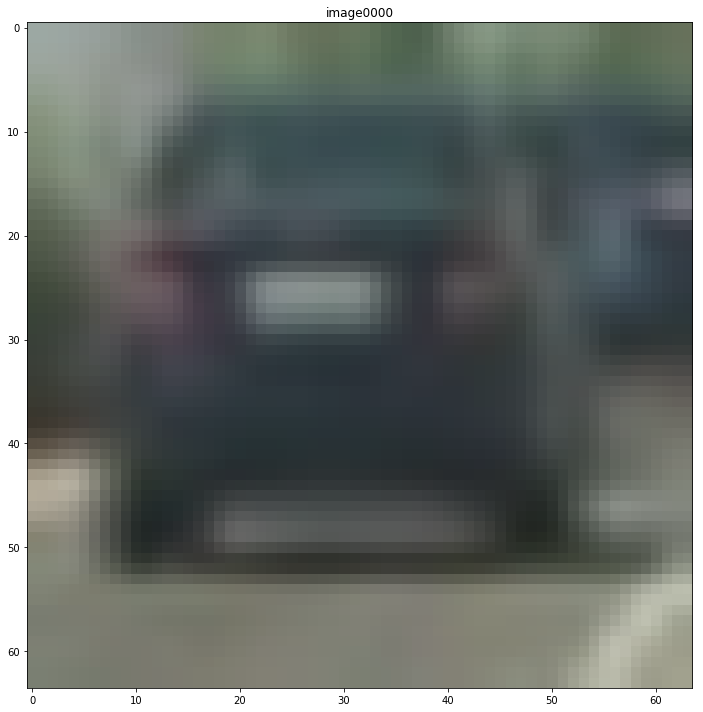

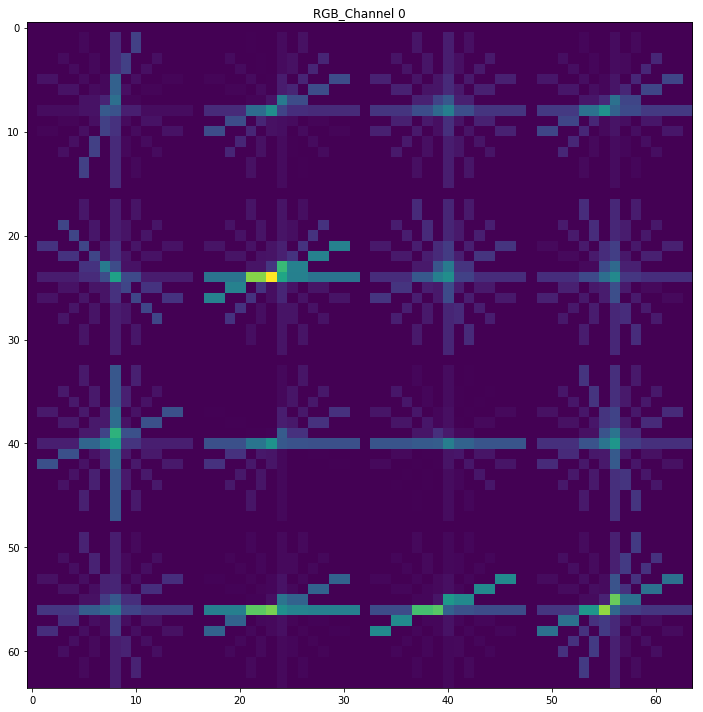

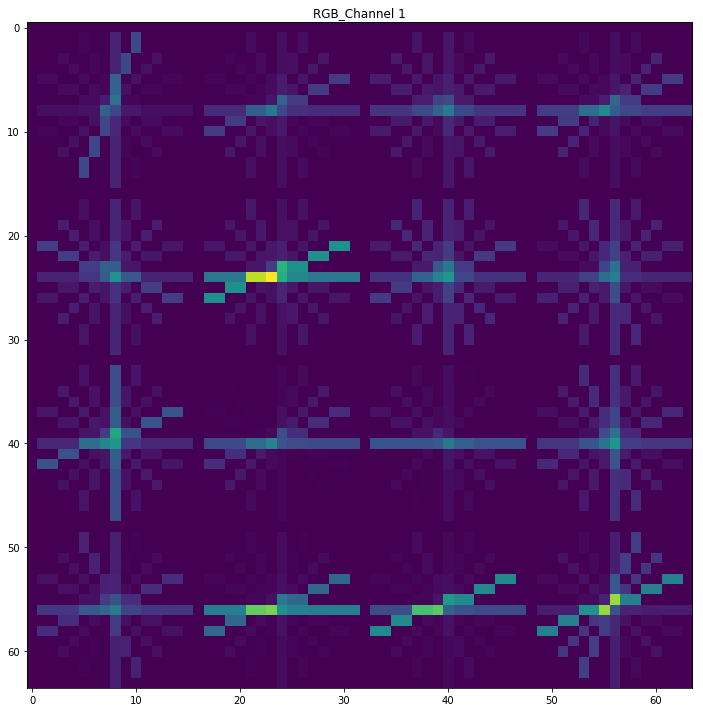

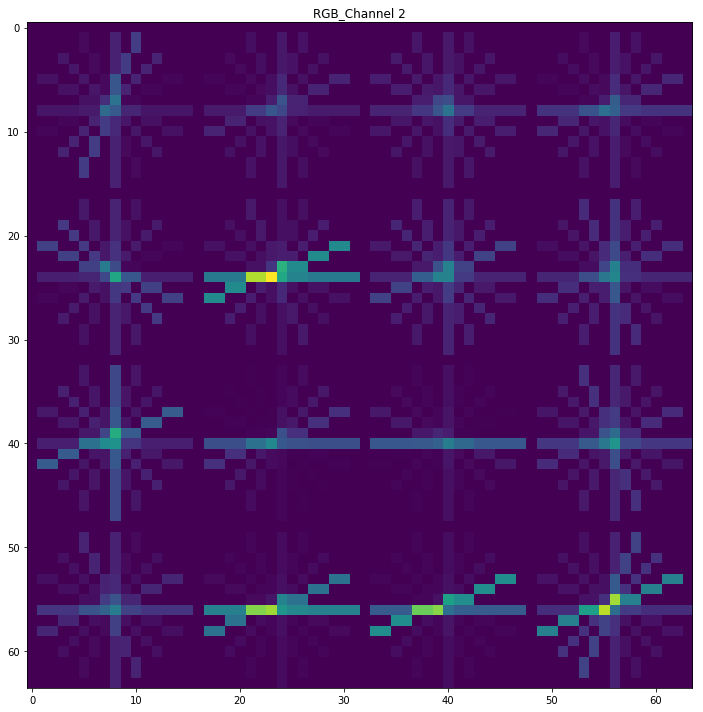

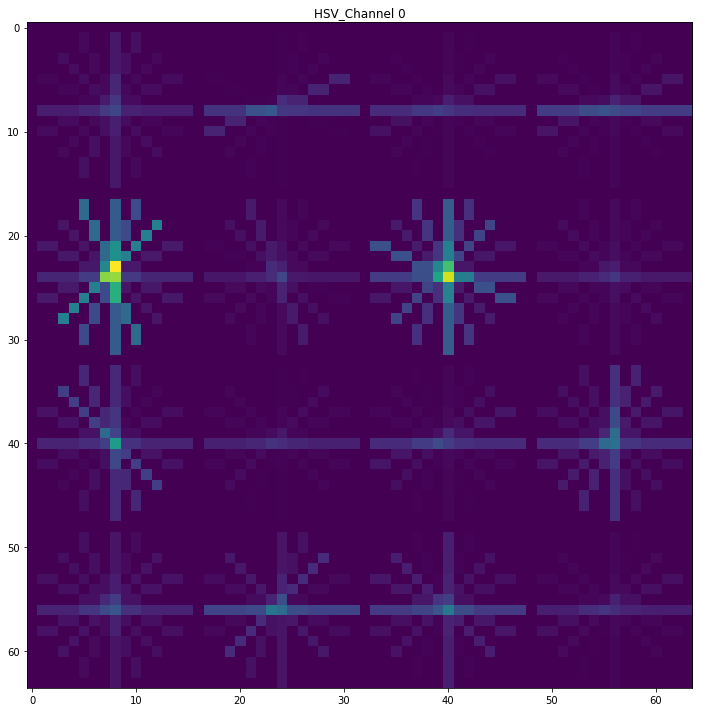

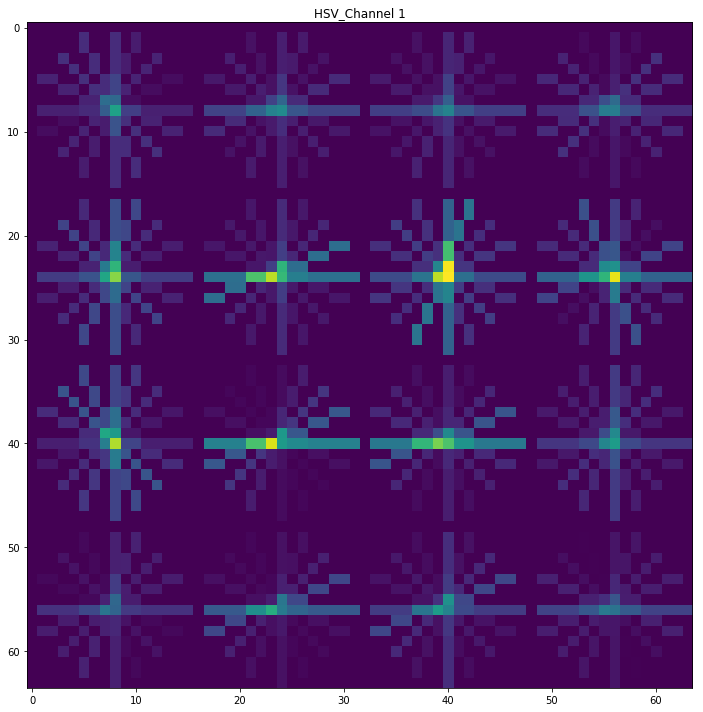

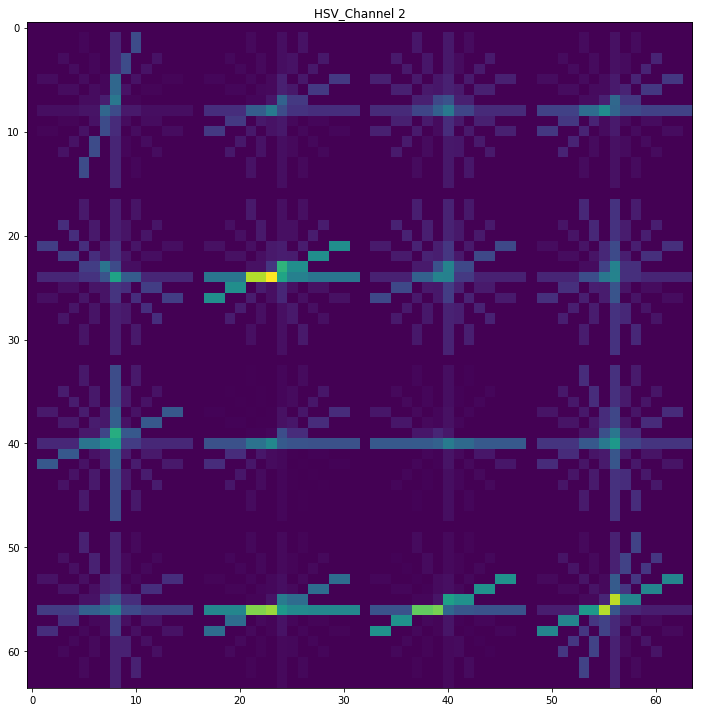

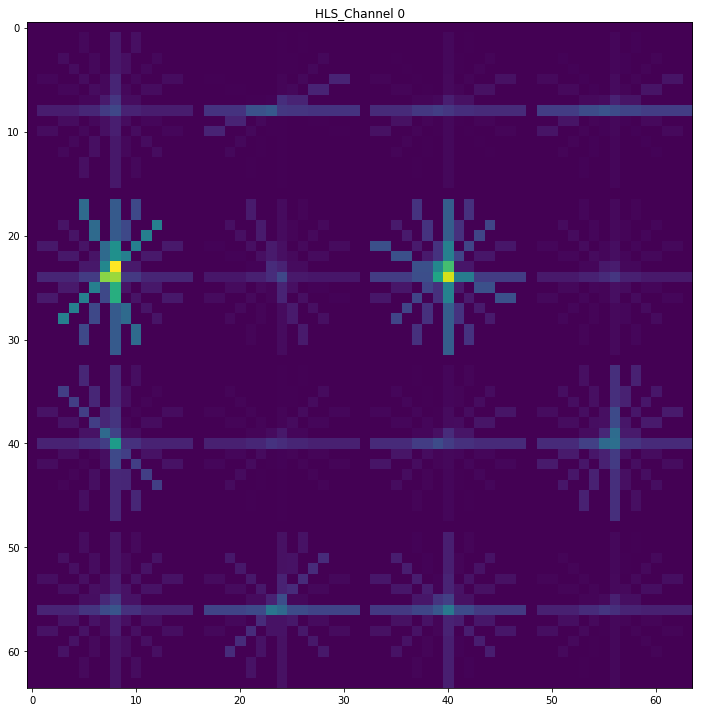

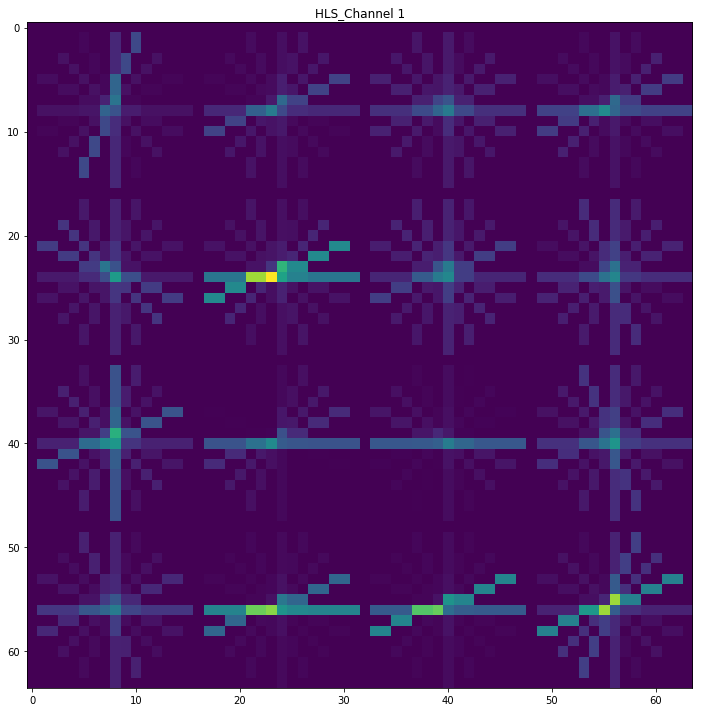

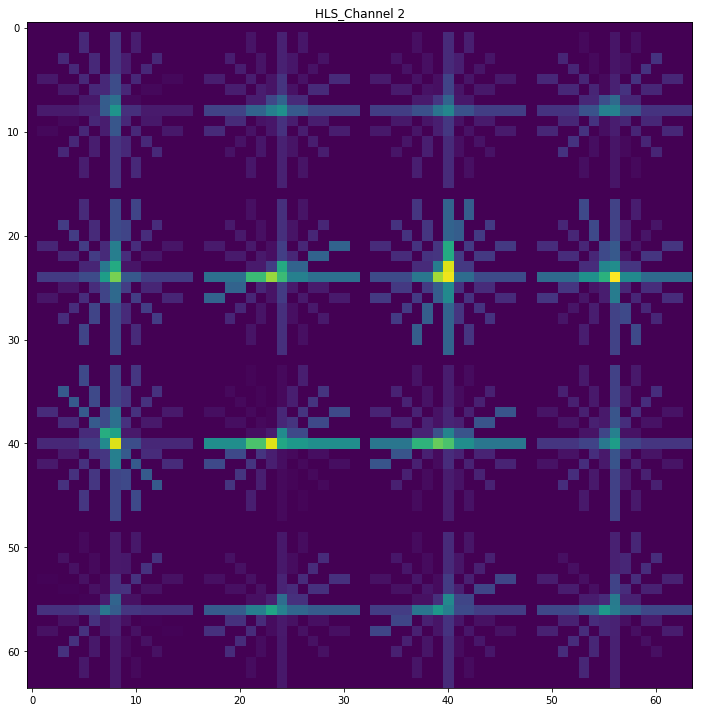

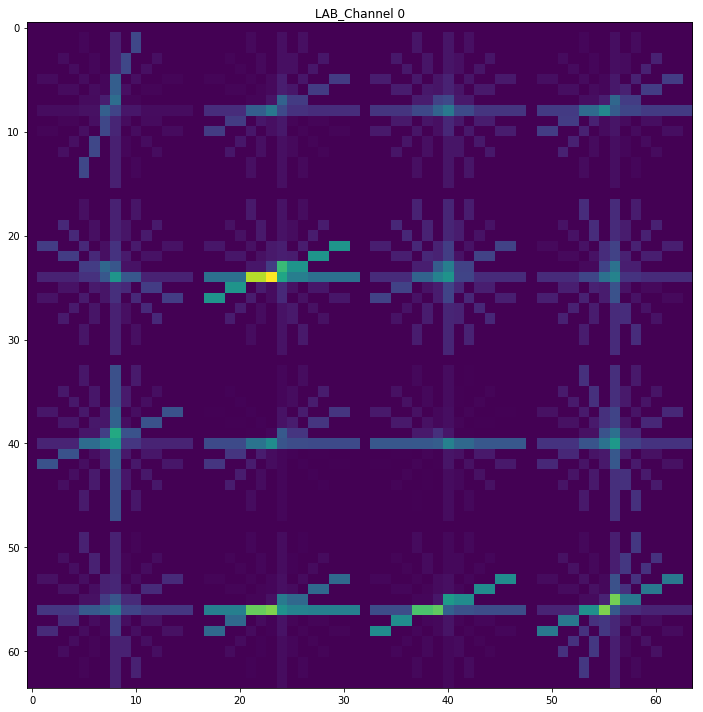

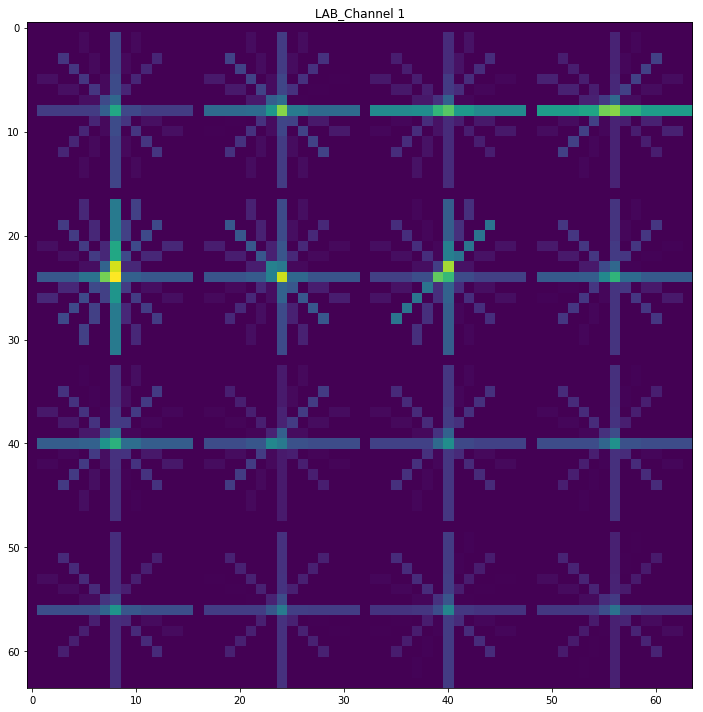

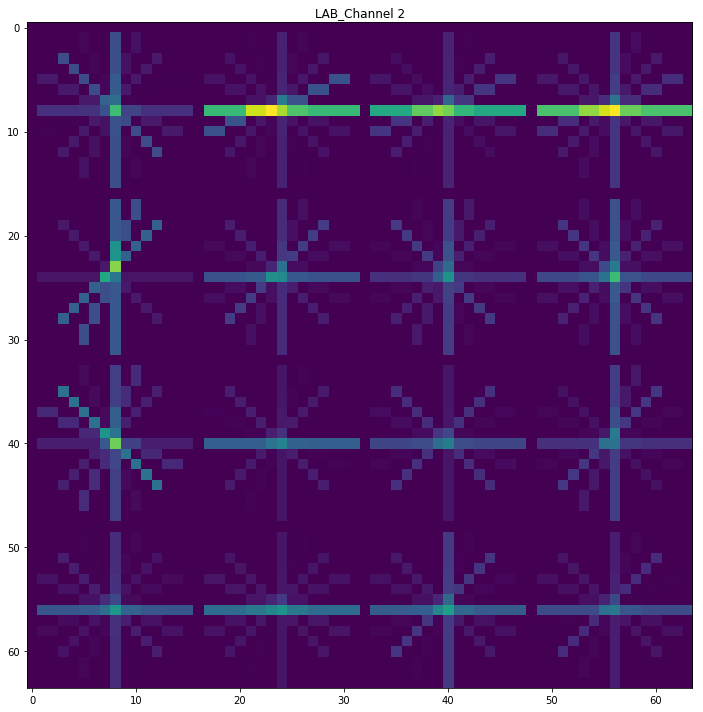

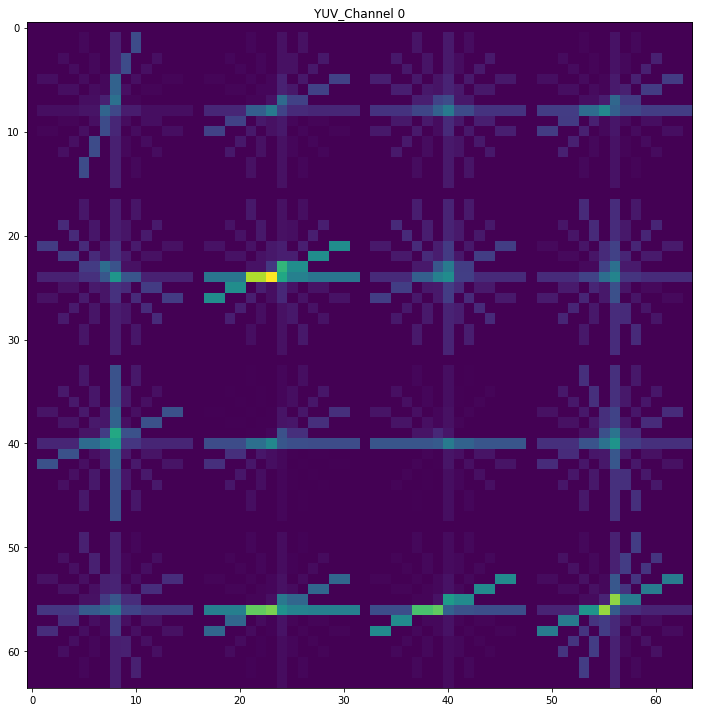

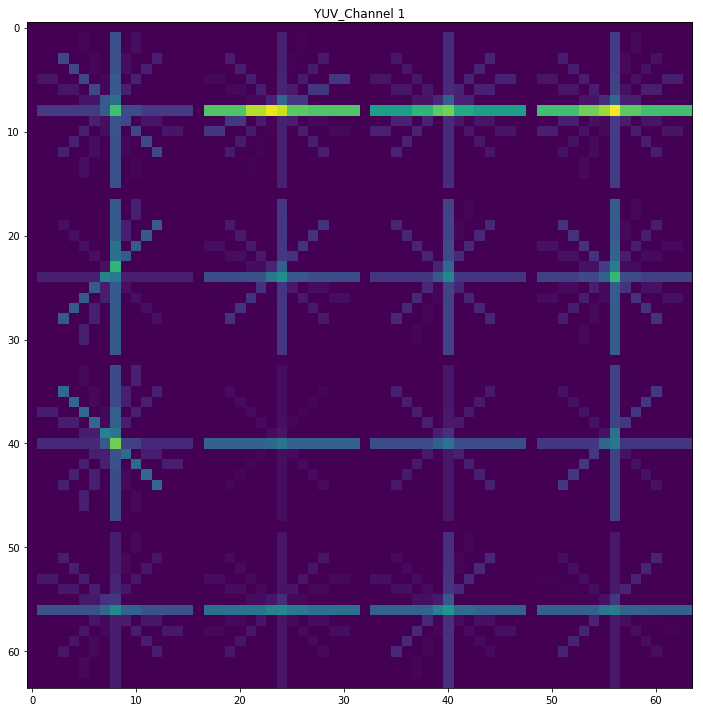

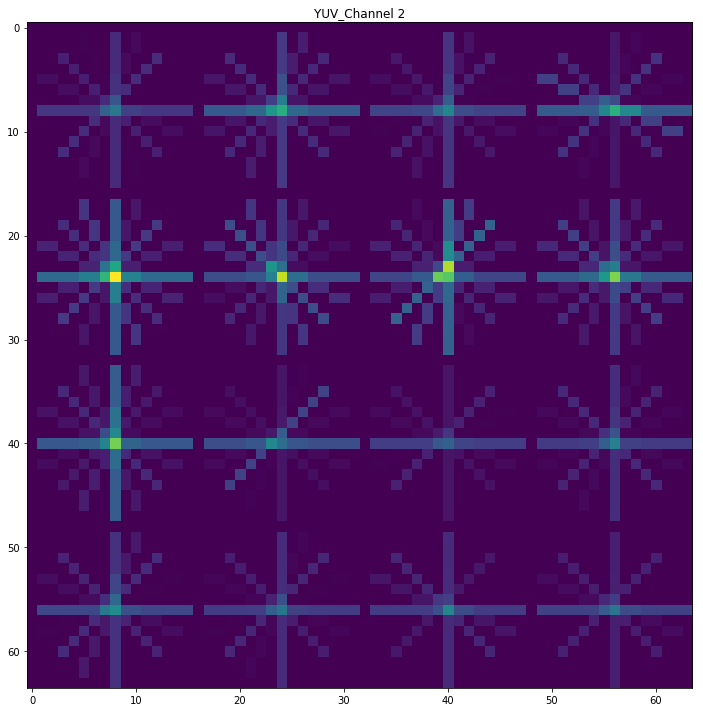

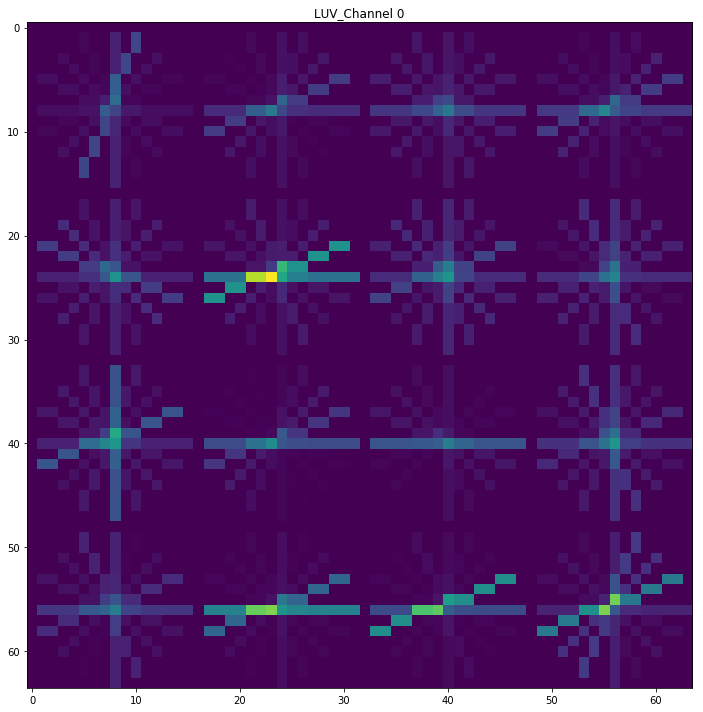

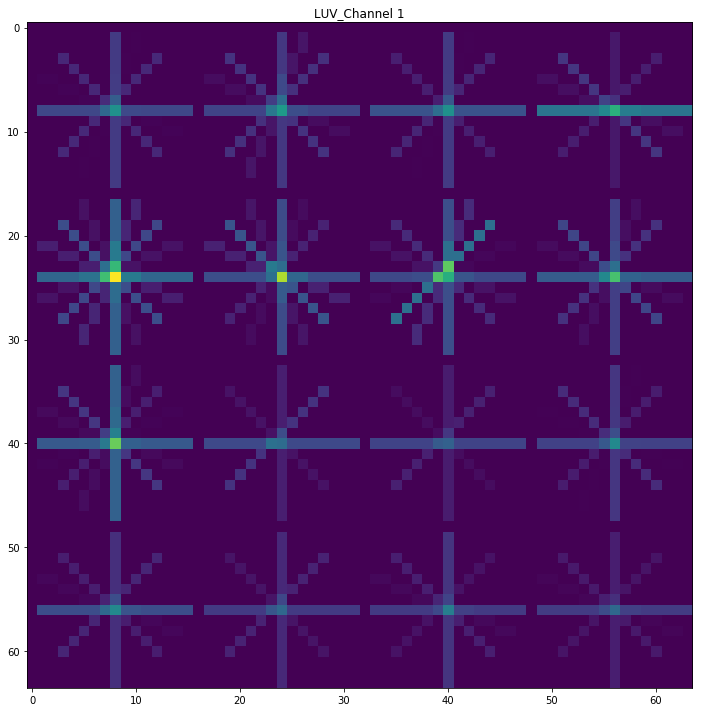

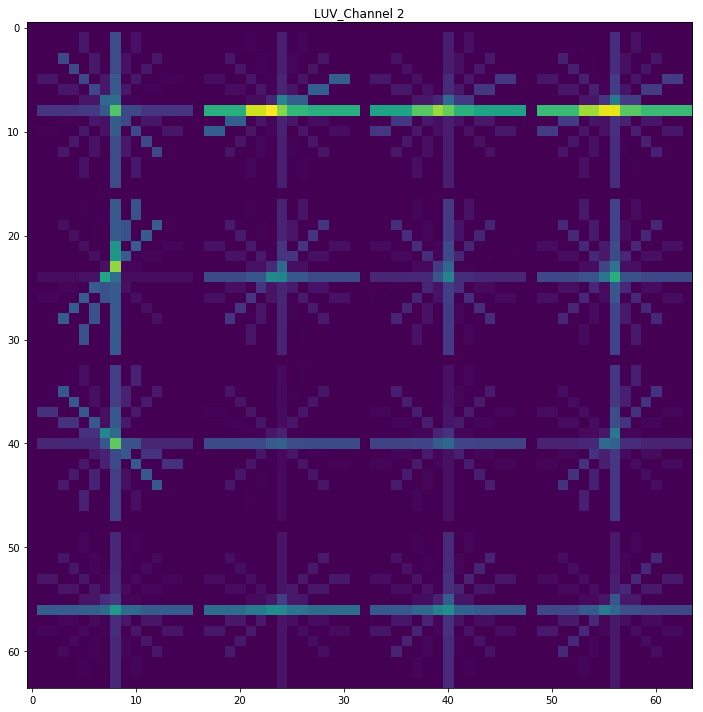

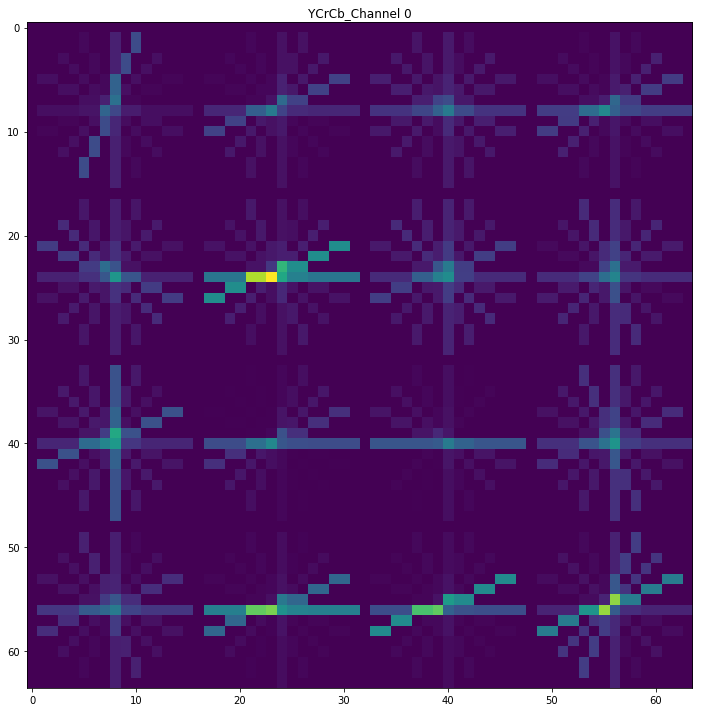

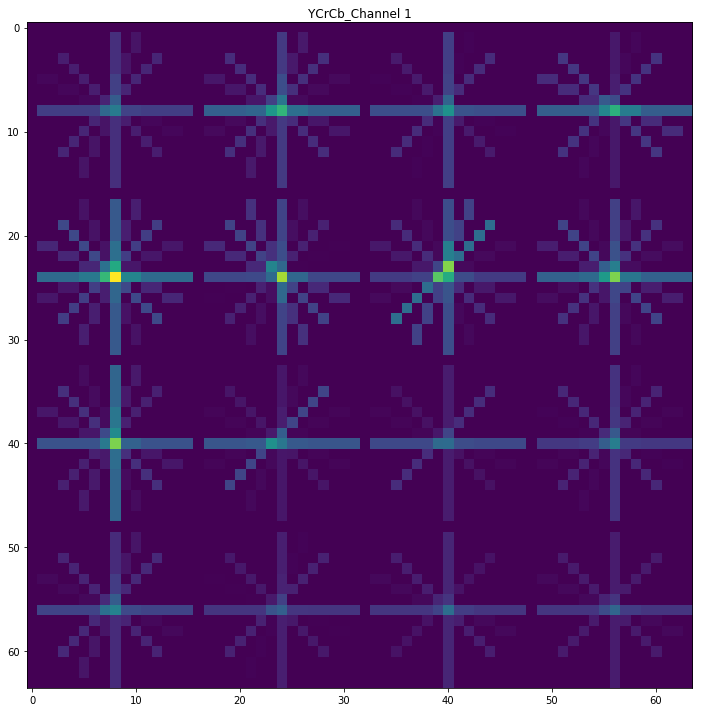

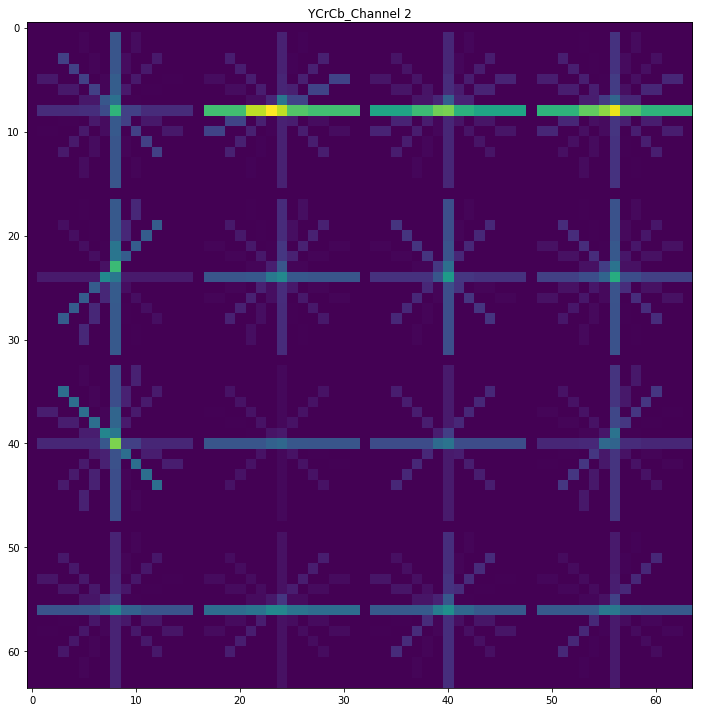

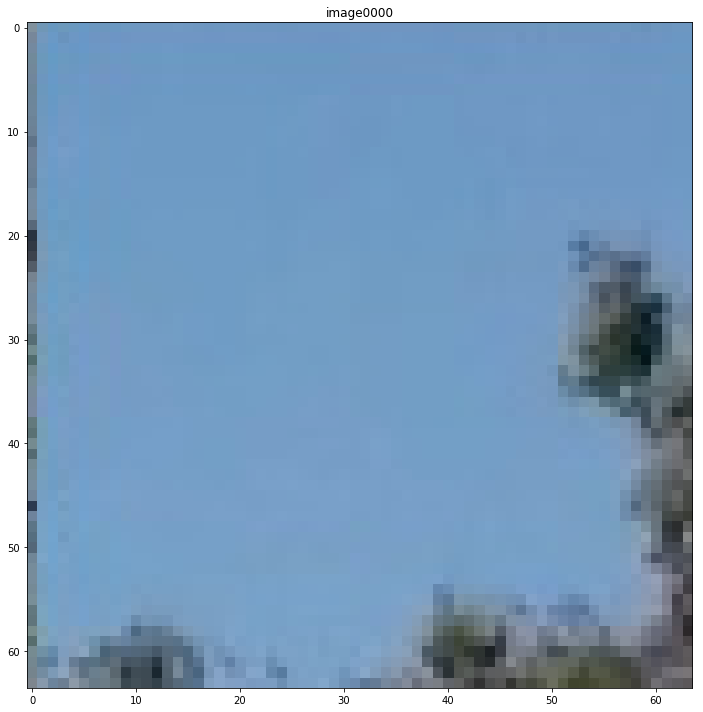

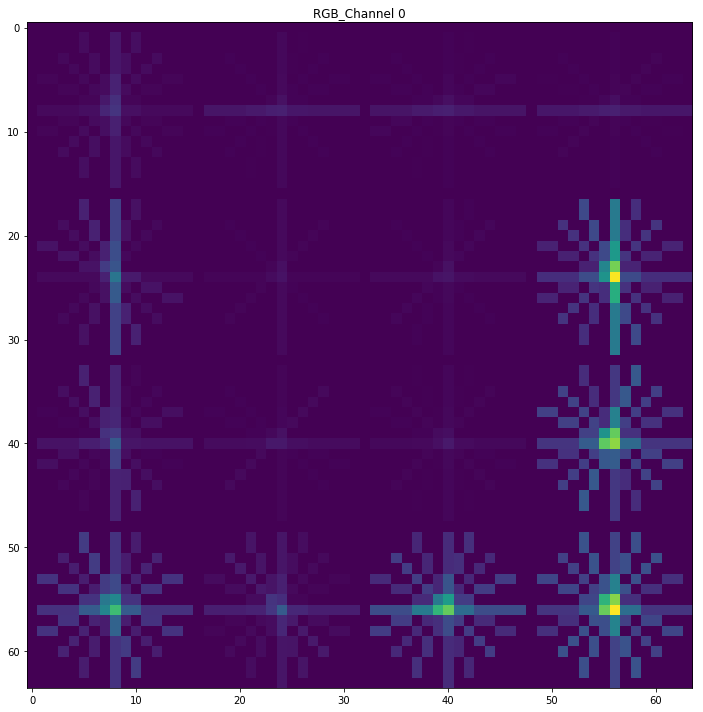

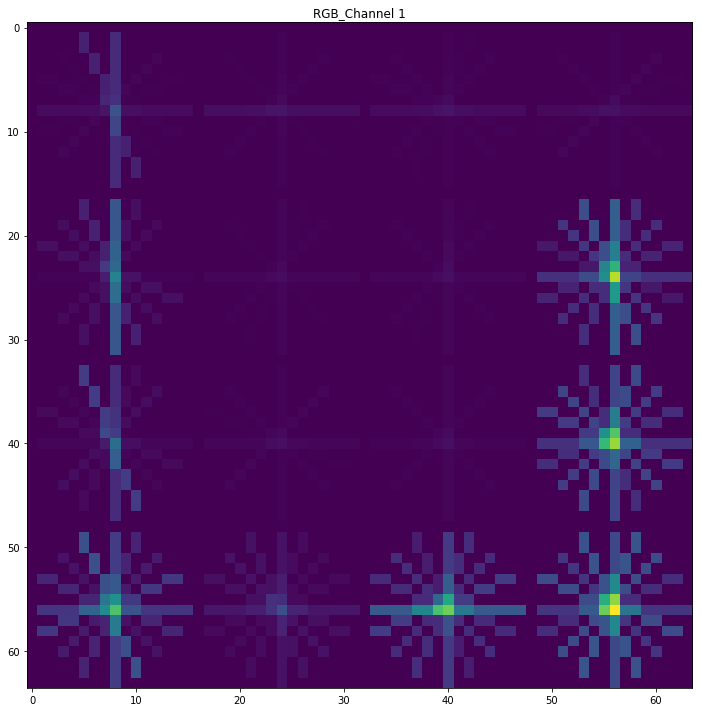

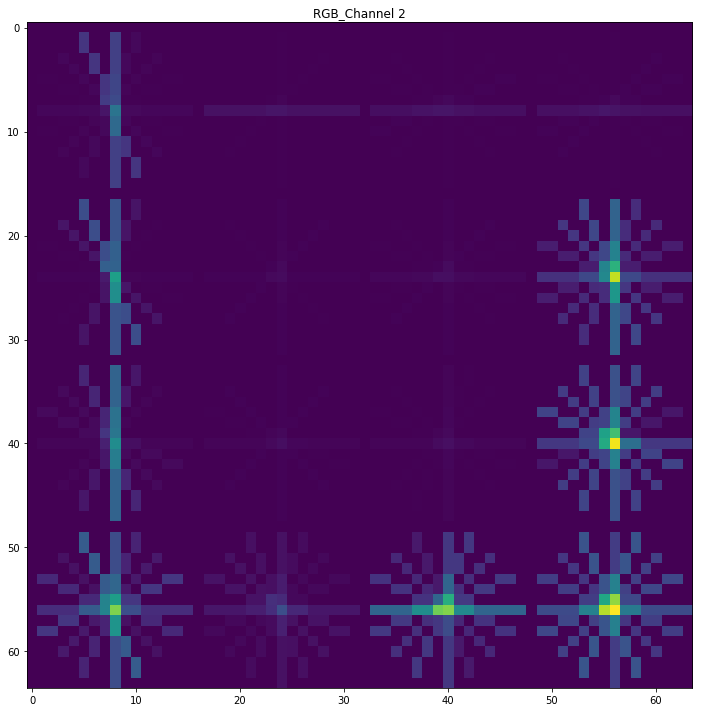

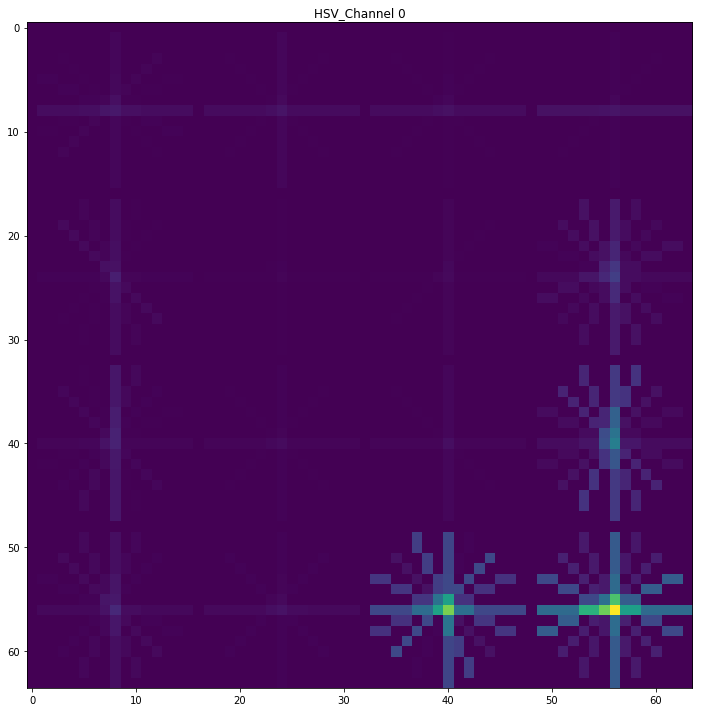

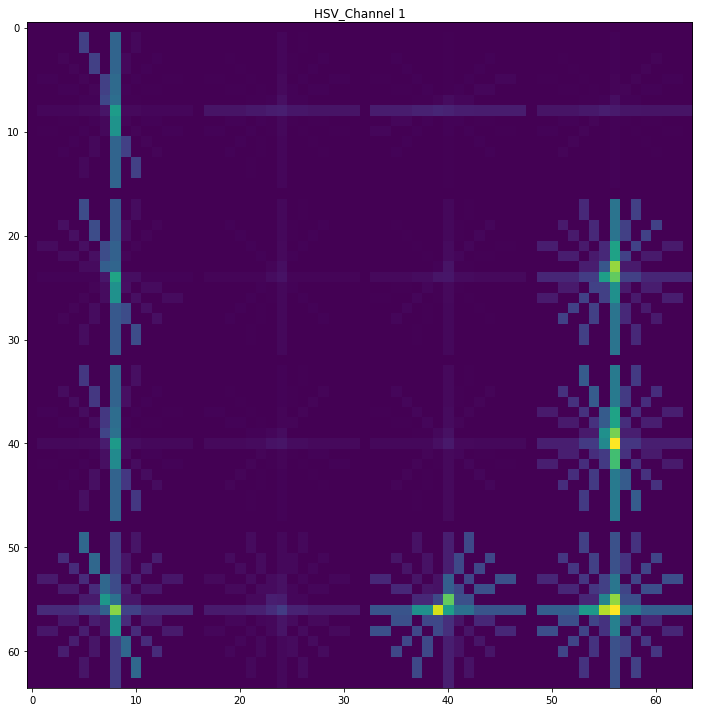

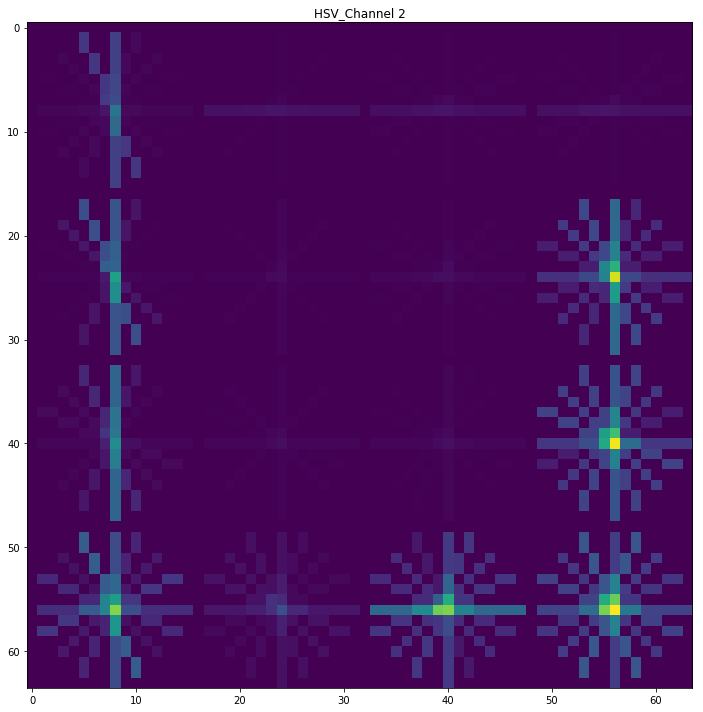

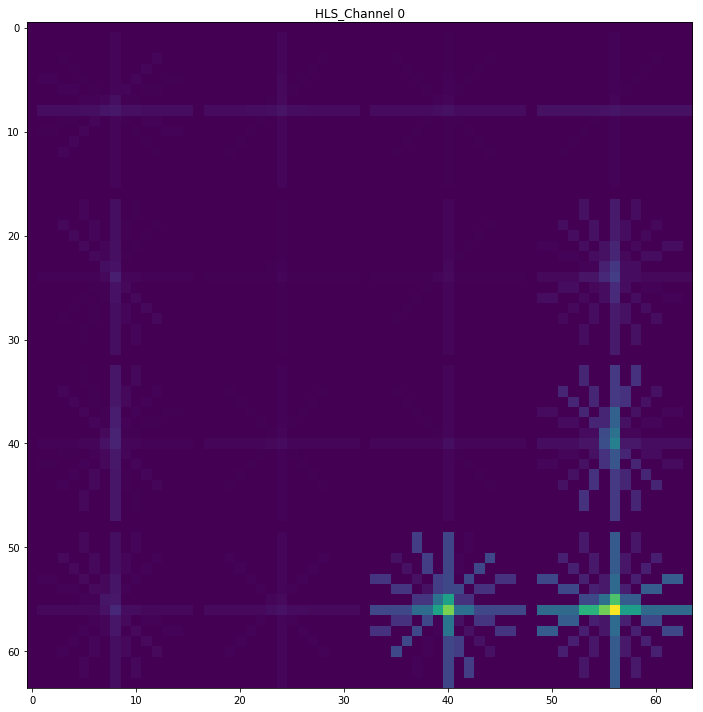

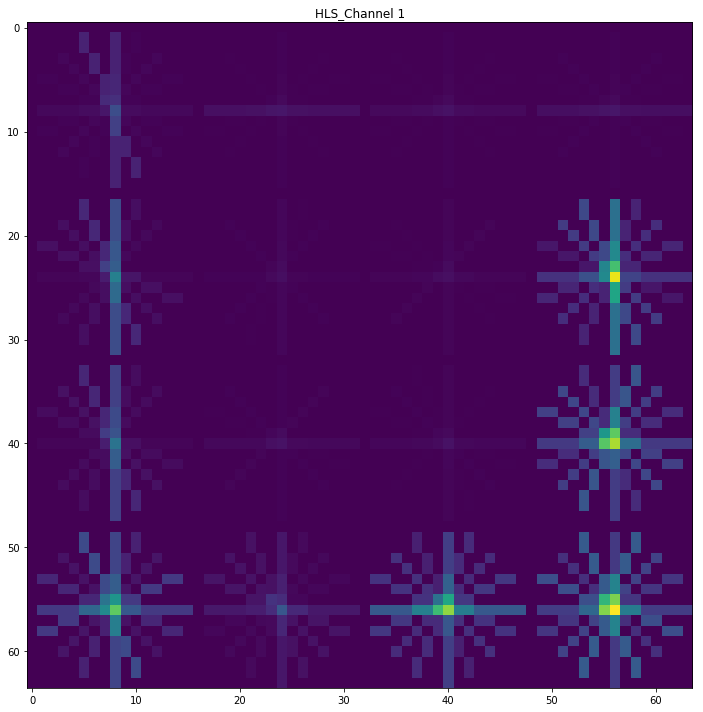

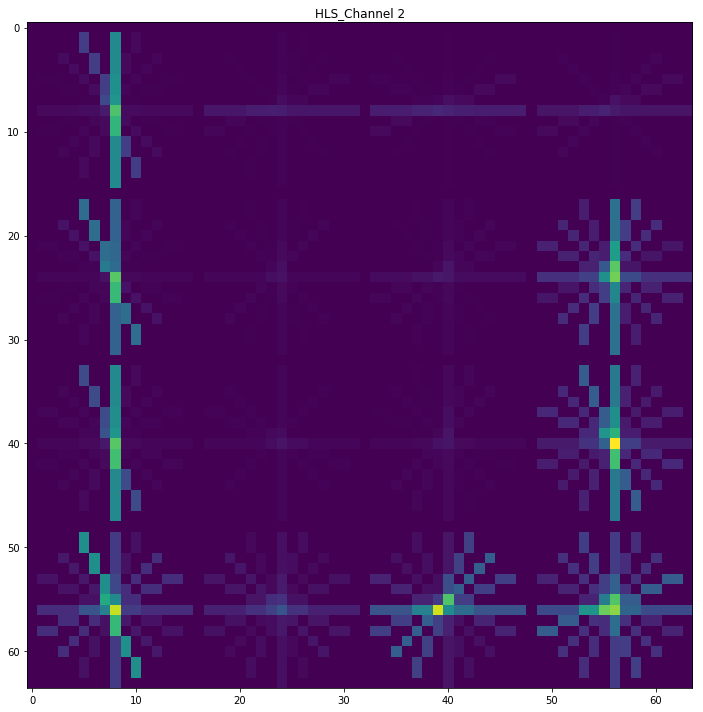

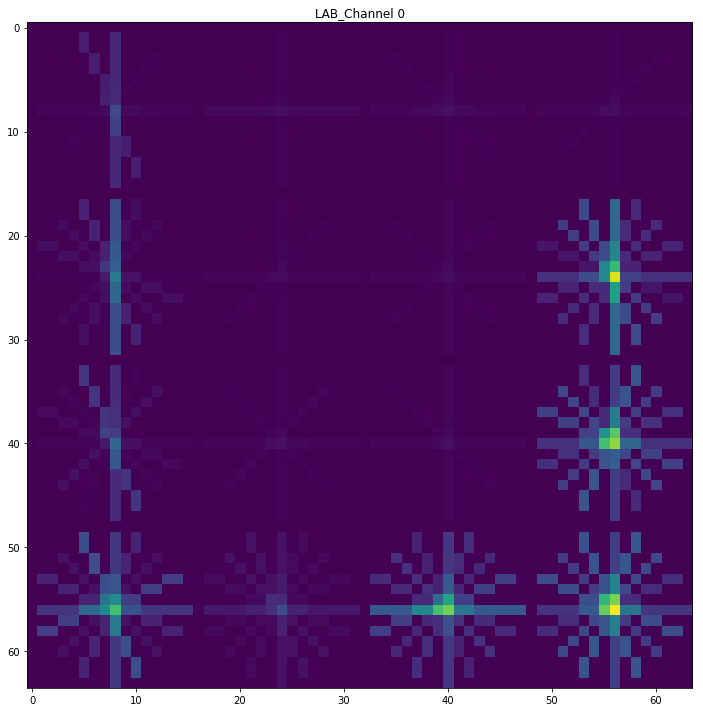

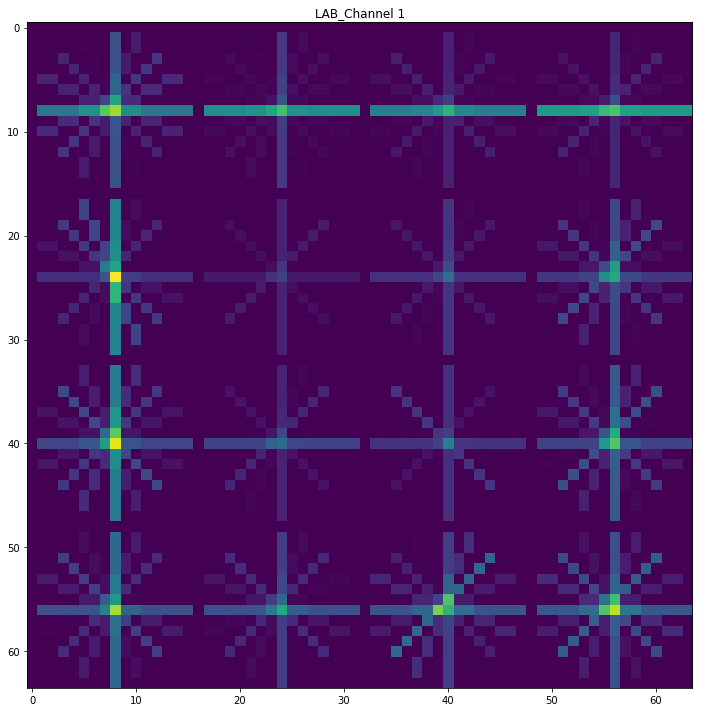

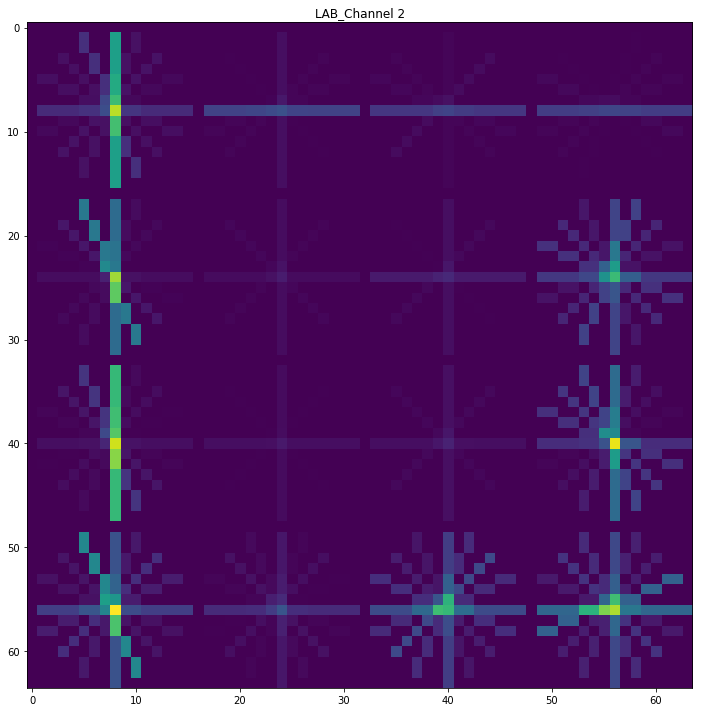

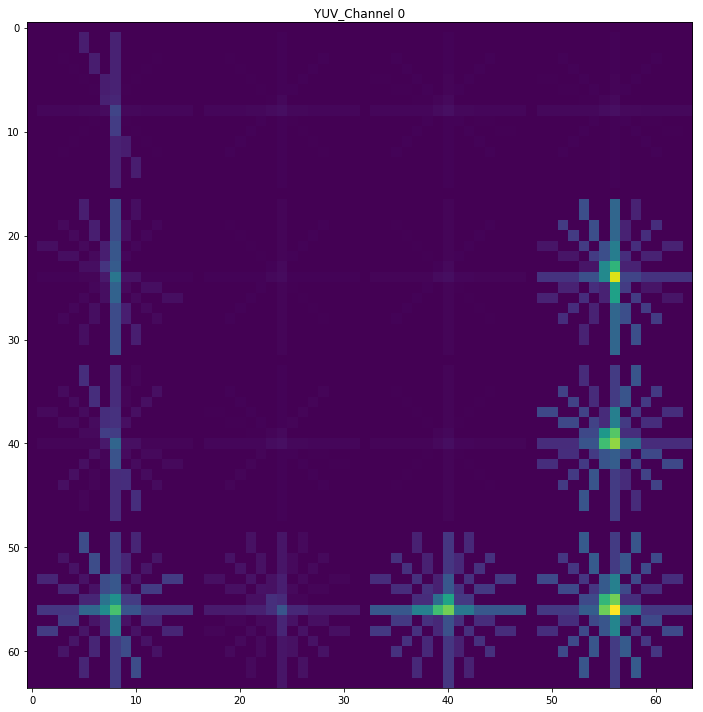

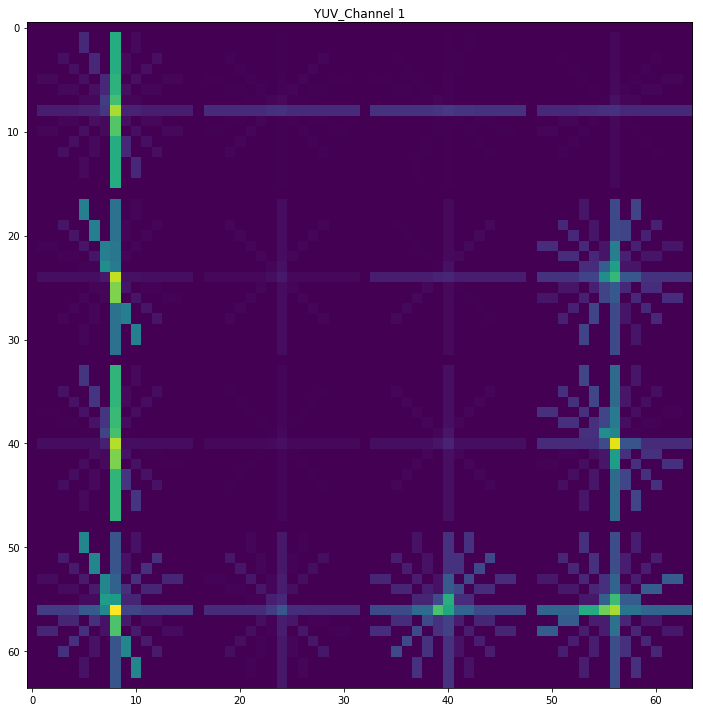

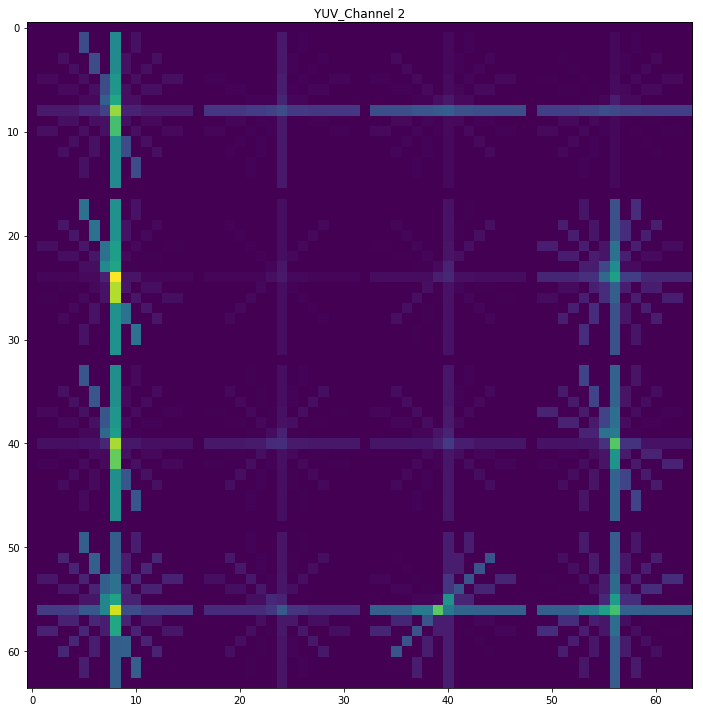

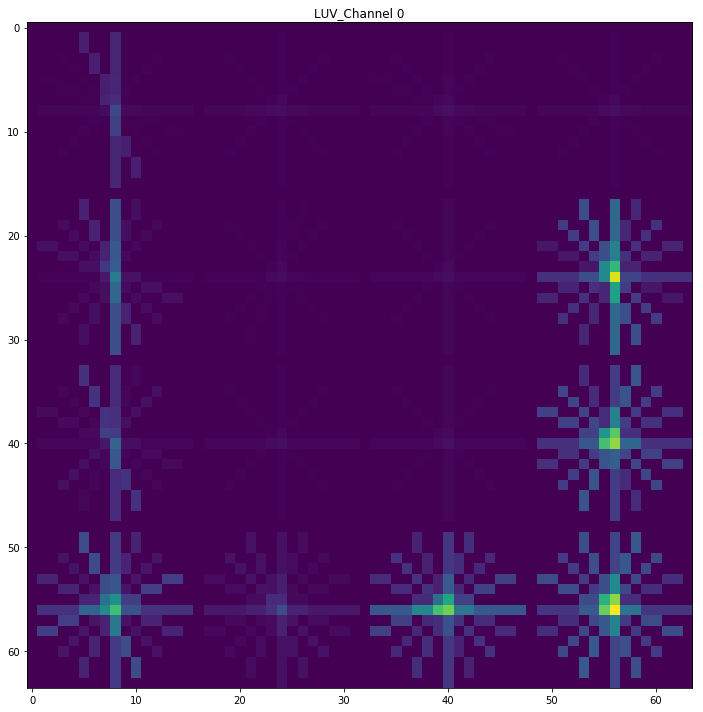

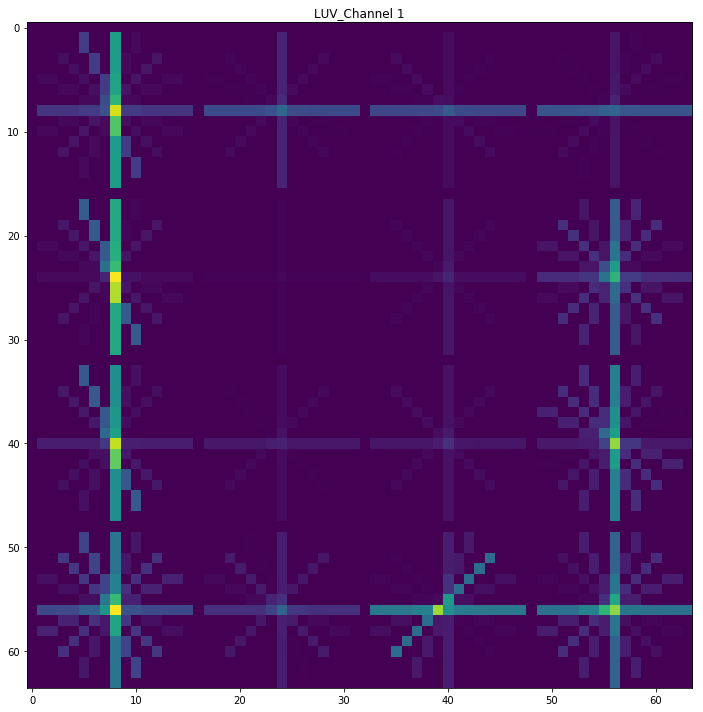

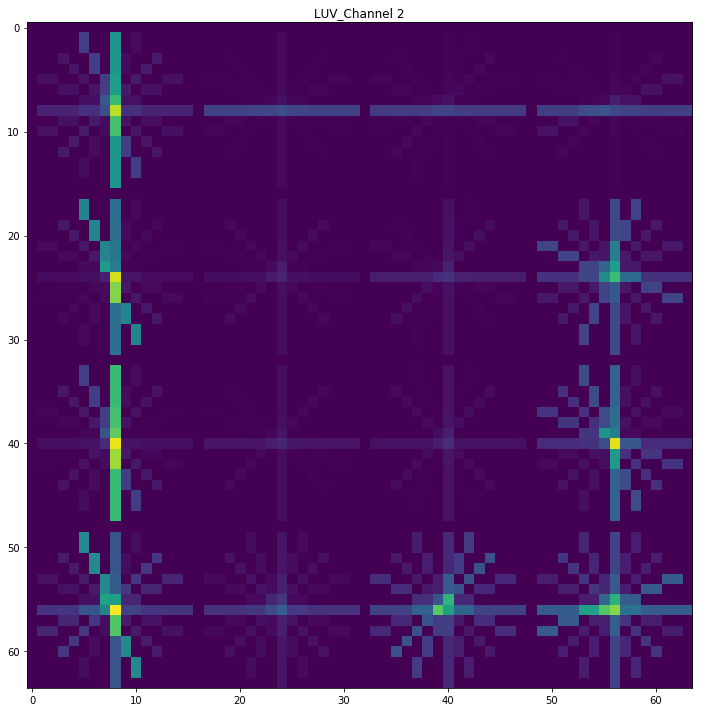

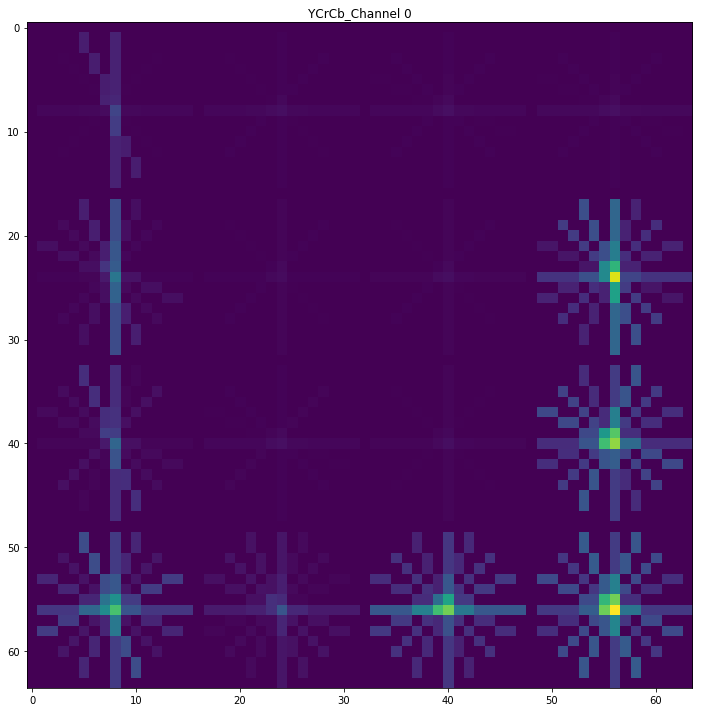

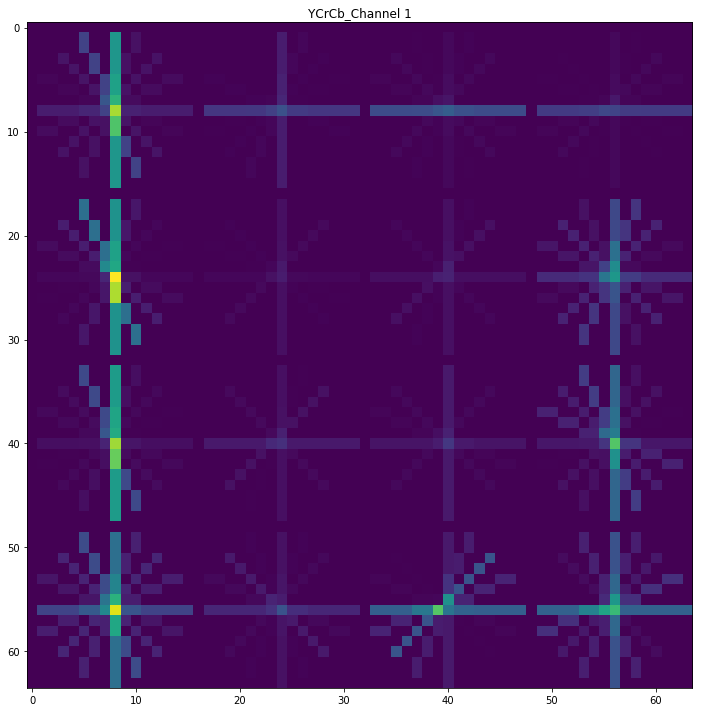

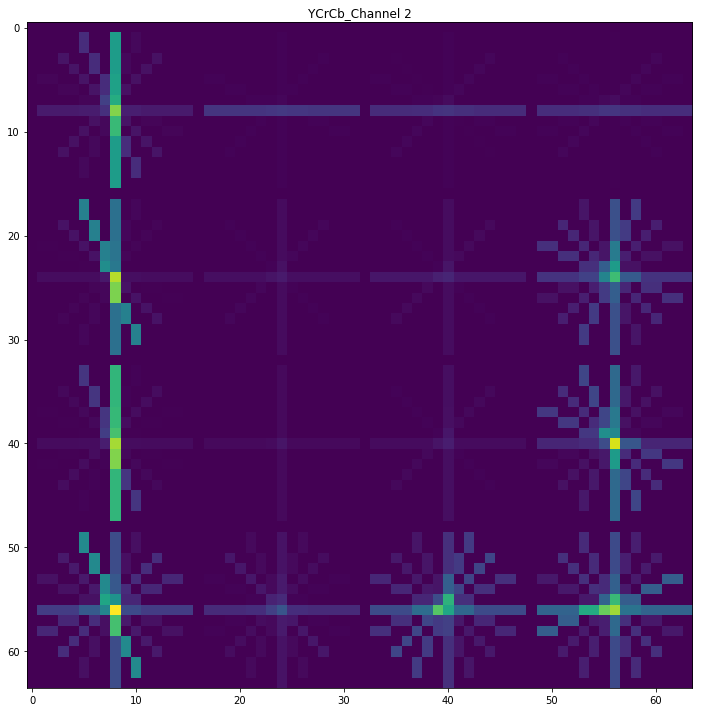

In [19]:
CarImageIndex = 0
#CarImageIndex = randint(0, len(CarImageSet))
HOGCarImage = [CarImageSet[CarImageIndex][imgPxlVal]]
HOGCarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(HOGCarImage, HOGCarImageLabel, 1, 1)
ExploreHOGSpace(HOGCarImage[0])

NonCarImageIndex = 0
#NonCarImageIndex = randint(0, len(NonCarImageSet))
HOGNonCarImage = [NonCarImageSet[NonCarImageIndex][imgPxlVal]]
HOGCarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(HOGNonCarImage, HOGCarImageLabel, 1, 1)
ExploreHOGSpace(HOGNonCarImage[0])

# Enough Visualization :D, Let's Extract Some Features

In [20]:
def normalize(data):
    return preprocessing.normalize(data)

In [21]:
AllowedColorSpace = ['RGB','HSV','HLS', 'LAB', 'YUV', 'LUV', 'YCrCb']
AllowedblockNorm = ['L1', 'L1-sqrt', 'L2', 'L2-Hys']

#Color Histogram
histSize = [48]
histrange = [0,255]
Hist_colorspace = "RGB"
CS_Ch_Idx = "All"

#Spatial Binning
size=(8, 8)
SB_colorspace = "RGB"

#HOG Params
HOG_colorspace = "RGB"
orient = 12
pix_per_cell = 16
cells_per_block = 4
blk_Norm = "L2-Hys"
TransformSqrt = True
feat_vec = True
HOG_Ch_Idx = "All"

In [22]:
def extractFeatures(img,CHist_EN=False,SB_EN=False,HOG_EN=False,Nrmlz=False,debug=False):
    
    hist_feat = []
    SB_feat = []
    hog_feat = []
    
    if CHist_EN == True:
        #Extract Color Hitogram Features
        if Hist_colorspace == "HSV":
            hist_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif Hist_colorspace == "HLS":
            hist_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif Hist_colorspace == "LAB":
            hist_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif Hist_colorspace == "YUV":
            hist_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif Hist_colorspace == "LUV":
            hist_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif Hist_colorspace == "YCrCb":
            hist_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: #Assume RGB No action needed
            hist_image = np.copy(img)
        
        if CS_Ch_Idx != "All":
            hist_feat = cv2.calcHist(hist_image,[CS_Ch_Idx],None,histSize,histrange)
        else:
            hist_feat = []
            for Ch_Idx in range(hist_image.shape[2]):
                hist_feat.append(cv2.calcHist(hist_image,[Ch_Idx],None,histSize,histrange))
        
        hist_feat = np.ravel(hist_feat).reshape(1, -1)

        if debug == True:
            print("Before Normalize")
            print(hist_feat.shape)
            print(hist_feat)
        
        if Nrmlz == True:
            hist_feat = normalize(hist_feat)
            hist_feat = hist_feat[0]
            if debug == True:
                print("After Normalize")
                print(hist_feat.shape)
                print(hist_feat)
        
    if SB_EN == True:
        #Extract Spatial Binning Features
        if Hist_colorspace == "HSV":
            SB_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif Hist_colorspace == "HLS":
            SB_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif Hist_colorspace == "LAB":
            SB_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif Hist_colorspace == "YUV":
            SB_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif Hist_colorspace == "LUV":
            SB_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif Hist_colorspace == "YCrCb":
            SB_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: #Assume RGB No action needed
            SB_image = np.copy(img)
        
        SB_feat = cv2.resize(SB_image, size).ravel().reshape(1, -1).astype(np.float64)

        if debug == True:
            print("Before Normalize")
            print(SB_feat.shape)
            print(SB_feat)
        
        if Nrmlz == True:
            SB_feat = normalize(SB_feat)
            SB_feat = SB_feat[0]
            if debug == True:
                print("After Normalize")
                print(SB_feat.shape)
                print(SB_feat)
    
    if HOG_EN == True:
        #Extract HOG Features
        if HOG_colorspace == "HSV":
            hog_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif HOG_colorspace == "HLS":
            hog_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif HOG_colorspace == "LAB":
            hog_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif HOG_colorspace == "YUV":
            hog_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif HOG_colorspace == "LUV":
            hog_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif HOG_colorspace == "YCrCb":
            hog_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: #Assume RGB No action needed
            hog_image = np.copy(img)
        
        if HOG_Ch_Idx != "All":
            hog_feat = get_hog_features_demo(
                img[:,:,HOG_Ch_Idx],
                orient,
                pix_per_cell,
                cells_per_block,
                blk_Norm,
                visualize=False,
                trns_sqrt=TransformSqrt,
                feature_vec=feat_vec)
        else:
            for Ch_Idx in range(hog_image.shape[2]):
                hog_feat.append(get_hog_features_demo(
                    img[:,:,Ch_Idx],
                    orient,
                    pix_per_cell,
                    cells_per_block,
                    blk_Norm,
                    visualize=False,
                    trns_sqrt=TransformSqrt,
                    feature_vec=feat_vec))
        
        hog_feat = np.ravel(hog_feat).reshape(1, -1)
        
        if debug == True:
            print("Before Normalize")
            print(hog_feat.shape)
            print(hog_feat)
        
        if Nrmlz == True:
            hog_feat = normalize(hog_feat)
            hog_feat = hog_feat[0]
            if debug == True:
                print("After Normalize")
                print(hog_feat.shape)
                print(hog_feat)
            
    features = np.hstack((hist_feat, SB_feat, hog_feat))
    
    if debug == True:
        print(len(features))
        print(features)
    
    #features = np.ravel(features)
    
    #if debug == True:
        #print(features.shape)
        #print(features)
        
    return features

##### Test Feature Extraction Function

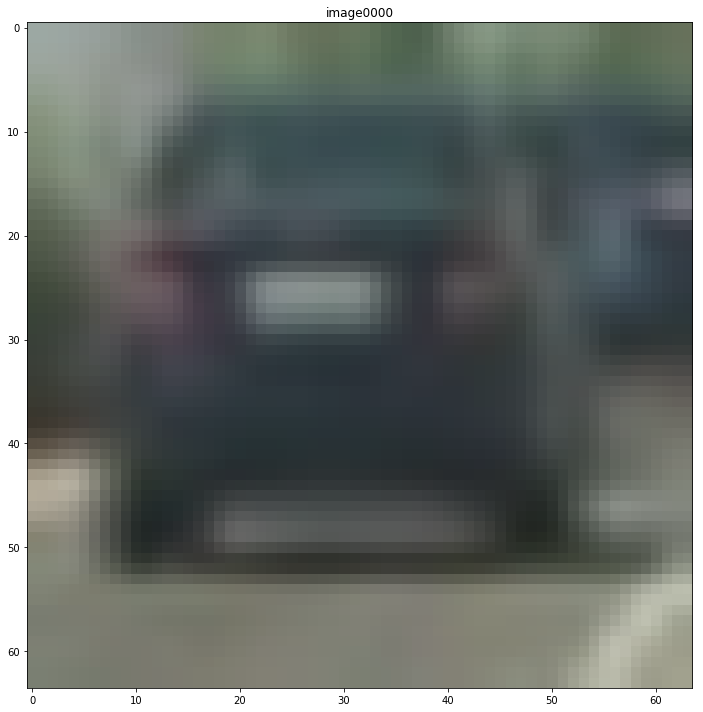

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.04541352,
        0.06812027,  0.10218041,  0.17030068,  0.09082703,  0.14759393,
        0.18165407,  0.18165407,  0.27248108,  0.09082703,  0.14759393,
        0.22706757,  0.09082703,  0.05676689,  0.09082703,  0.07947365,
        0.09082703,  0.04541352,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.04541352,  0.06812027,  0.10218041,
        0.17030068,  0.10218041,  0.1589473 ,  0.1589473 ,  0.21

In [25]:
CarImageIndex = 0
#CarImageIndex = randint(0, len(CarImageSet))
HOGCarImage = [CarImageSet[CarImageIndex][imgPxlVal]]
HOGCarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(HOGCarImage, HOGCarImageLabel, 1, 1)
extractFeatures(HOGCarImage[0],
                CHist_EN=True,
                SB_EN=True,
                HOG_EN=True,
                Nrmlz=True,
                debug=False)

In [26]:
Car_features = []
NonCar_features = []

for image in CarImageSet:
    Car_features.append(extractFeatures(image[imgPxlVal],
                                        CHist_EN=True,
                                        SB_EN=True,
                                        HOG_EN=True,
                                        Nrmlz=True,
                                        debug=False))
print("Car Feature Collected")

for image in NonCarImageSet:
    NonCar_features.append(extractFeatures(image[imgPxlVal],
                                        CHist_EN=True,
                                        SB_EN=True,
                                        HOG_EN=True,
                                        Nrmlz=True,
                                        debug=False))
print("Non Car Feature Collected")

Car Feature Collected
Non Car Feature Collected


In [27]:
FeatureSet = np.vstack((Car_features, NonCar_features)).astype(np.float64)
LbaelSet = np.hstack((np.ones(len(Car_features)), np.zeros(len(NonCar_features))))

In [28]:
Feature_scaler = StandardScaler().fit(FeatureSet)
Scaled_FeatureSet = Feature_scaler.transform(FeatureSet)

In [33]:
#Print the Scaled feature set to compare with the original feature set
np.savetxt('FeatureSet.txt', FeatureSet)
np.savetxt('Scaled_FeatureSet.txt', Scaled_FeatureSet)